# Comprehensive Guide to Logistic Regression 🎯

## A Complete Journey from Supervised Learning to Practical Implementation

Welcome to this comprehensive, beginner-friendly guide to logistic regression! In this notebook, we'll take a systematic journey through:

1. **Supervised Learning Fundamentals** - Understanding the foundation
2. **Regression vs Classification** - Key differences explained
3. **Logistic Regression Introduction** - Why we need it
4. **The Sigmoid Function** - The mathematical heart
5. **Maximum Likelihood Estimation** - The statistical foundation
6. **Gradient Descent** - The optimization process
7. **Practical Implementation** - Using scikit-learn
8. **Model Evaluation** - Measuring performance

Let's begin this exciting journey! 🚀

---

## Table of Contents
1. [What is Supervised Learning?](#1-what-is-supervised-learning)
2. [Regression vs. Classification](#2-regression-vs-classification)
3. [Introduction to Logistic Regression](#3-introduction-to-logistic-regression)
4. [The Sigmoid Function](#4-the-sigmoid-function)
5. [Maximum Likelihood Estimation (MLE) and Logistic Regression](#5-maximum-likelihood-estimation-mle-and-logistic-regression)
6. [Gradient Descent: Concept and Visualization](#6-gradient-descent-concept-and-visualization)
7. [Implementing Logistic Regression with scikit-learn](#7-implementing-logistic-regression-with-scikit-learn)
8. [Evaluating a Logistic Regression Model](#8-evaluating-a-logistic-regression-model)

# 1. What is Supervised Learning? 🎓

## Understanding the Foundation

**Supervised Learning** is like learning with a teacher! Just as you learn to recognize different objects by looking at labeled examples, supervised learning algorithms learn patterns from **labeled training data**.

### Key Concepts:

🎯 **Task (T)**: What we want the computer to learn (e.g., predict if an email is spam)  
📊 **Performance Measure (P)**: How we measure success (e.g., accuracy percentage)  
🧠 **Experience (E)**: The labeled training data we provide  

> *"A computer program is said to **learn** from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E."* - Tom Mitchell

### The Machine Learning Hierarchy

```
Artificial Intelligence
    └── Machine Learning
        ├── Supervised Learning (we are here! 👈)
        │   ├── Classification (cat vs dog)
        │   └── Regression (predict house prices)
        └── Unsupervised Learning
```

Let's see supervised learning in action with a simple example!

In [23]:
# Let's create a simple supervised learning example!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a small labeled dataset - predicting if someone will buy a product
data = {
    'Age': [25, 35, 45, 20, 55, 30, 40, 50],
    'Income': [30000, 50000, 70000, 25000, 80000, 45000, 60000, 75000],
    'Will_Buy': ['No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes']  # This is our LABEL!
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("📊 Example of Labeled Training Data:")
print("="*40)
print(df)
print("\n💡 Notice:")
print("• Age and Income are our FEATURES (X)")
print("• Will_Buy is our LABEL/TARGET (y)")
print("• We have 8 labeled examples to learn from")
print("• Goal: Predict Will_Buy for new customers!")

📊 Example of Labeled Training Data:
   Age  Income Will_Buy
0   25   30000       No
1   35   50000      Yes
2   45   70000      Yes
3   20   25000       No
4   55   80000      Yes
5   30   45000      Yes
6   40   60000      Yes
7   50   75000      Yes

💡 Notice:
• Age and Income are our FEATURES (X)
• Will_Buy is our LABEL/TARGET (y)
• We have 8 labeled examples to learn from
• Goal: Predict Will_Buy for new customers!


# 2. Regression vs. Classification 📈📊

## Understanding the Two Main Types of Supervised Learning

Supervised learning problems fall into two main categories:

### 🏠 **Regression** - Predicting Numbers
- **Goal**: Predict a continuous numerical value
- **Examples**: House prices, temperature, stock prices, salary
- **Output**: Any real number (e.g., $250,000, 72.5°F, $55,000)
- **Question Type**: "How much?" or "How many?"

### 🎯 **Classification** - Predicting Categories  
- **Goal**: Predict which category/class something belongs to
- **Examples**: Email spam/not spam, disease/no disease, cat/dog
- **Output**: Discrete categories (e.g., "Yes"/"No", "Spam"/"Ham")
- **Question Type**: "Which category?" or "Is it...?"

### Binary vs Multiclass Classification
- **Binary**: Only 2 classes (Spam/Ham, Pass/Fail)
- **Multiclass**: 3+ classes (Dog/Cat/Bird, Grade A/B/C/D/F)

Let's visualize both types with examples!

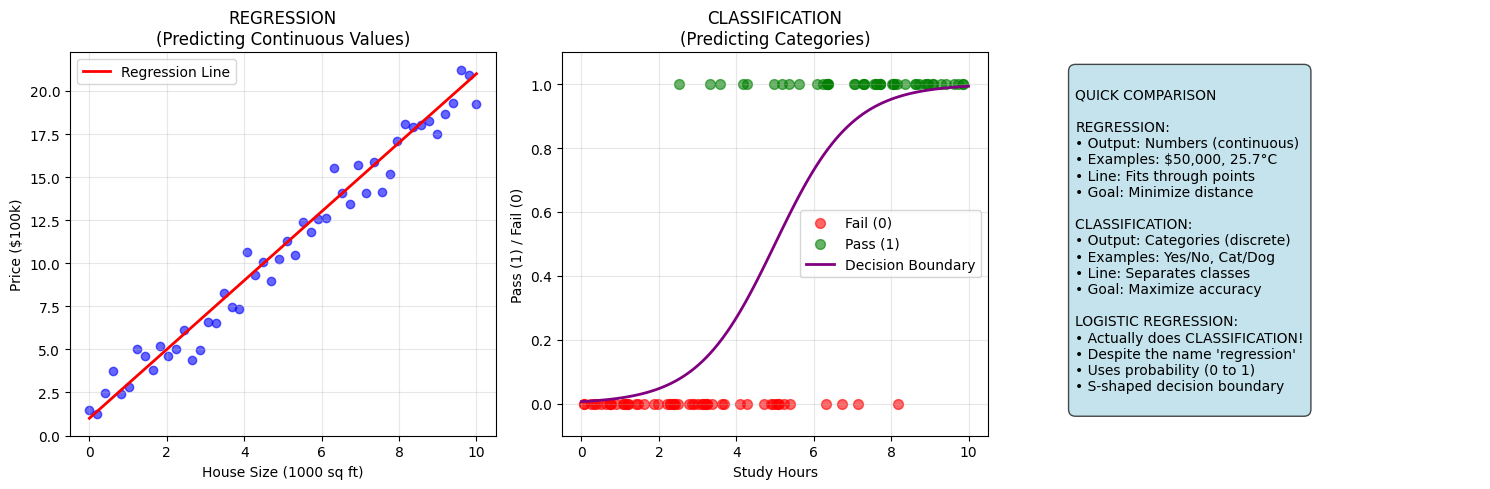

In [24]:
# Let's visualize Regression vs Classification!
plt.figure(figsize=(15, 5))

# Generate sample data
np.random.seed(42)
x = np.linspace(0, 10, 50)

# REGRESSION Example - Predicting house prices based on size
plt.subplot(1, 3, 1)
y_regression = 2 * x + 1 + np.random.normal(0, 1, 50)  # Linear relationship with noise
plt.scatter(x, y_regression, alpha=0.6, color='blue')
plt.plot(x, 2*x + 1, color='red', linewidth=2, label='Regression Line')
plt.xlabel('House Size (1000 sq ft)')
plt.ylabel('Price ($100k)')
plt.title('REGRESSION\n(Predicting Continuous Values)')
plt.legend()
plt.grid(True, alpha=0.3)

# CLASSIFICATION Example - Predicting pass/fail based on study hours
plt.subplot(1, 3, 2)
study_hours = np.random.uniform(0, 10, 100)
# Create binary classification: more study hours = higher chance of passing
pass_probability = 1 / (1 + np.exp(-(study_hours - 5)))  # Sigmoid function
results = np.random.binomial(1, pass_probability)

# Plot points
pass_students = study_hours[results == 1]
fail_students = study_hours[results == 0]

plt.scatter(fail_students, np.zeros(len(fail_students)), alpha=0.6, color='red', label='Fail (0)', s=50)
plt.scatter(pass_students, np.ones(len(pass_students)), alpha=0.6, color='green', label='Pass (1)', s=50)

# Add decision boundary
x_boundary = np.linspace(0, 10, 100)
y_boundary = 1 / (1 + np.exp(-(x_boundary - 5)))
plt.plot(x_boundary, y_boundary, color='purple', linewidth=2, label='Decision Boundary')

plt.xlabel('Study Hours')
plt.ylabel('Pass (1) / Fail (0)')
plt.title('CLASSIFICATION\n(Predicting Categories)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

# COMPARISON TABLE
plt.subplot(1, 3, 3)
plt.axis('off')
comparison_text = """
QUICK COMPARISON

REGRESSION:
• Output: Numbers (continuous)
• Examples: $50,000, 25.7°C
• Line: Fits through points
• Goal: Minimize distance

CLASSIFICATION:  
• Output: Categories (discrete)
• Examples: Yes/No, Cat/Dog
• Line: Separates classes
• Goal: Maximize accuracy

LOGISTIC REGRESSION:
• Actually does CLASSIFICATION!
• Despite the name 'regression'
• Uses probability (0 to 1)
• S-shaped decision boundary
"""

plt.text(0.05, 0.95, comparison_text, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()



# 3. Introduction to Logistic Regression 🎯

## Why Linear Regression Fails for Classification

Imagine you want to predict whether someone earns more than $40,000 based on their age. You might think: "Let's use linear regression!" But there's a problem...

### The Problem with Linear Regression for Classification

1. **Outputs can be outside [0,1]**: Linear regression can predict negative probabilities or probabilities > 100%!
2. **Straight lines don't fit binary data well**: We need an S-shaped curve
3. **No probability interpretation**: Hard to interpret results as probabilities

### Enter Logistic Regression! 🦸‍♀️

**Logistic Regression** solves these problems by:
- ✅ **Outputs probabilities** between 0 and 1
- ✅ **Uses S-shaped curve** (sigmoid function) 
- ✅ **Perfect for classification** tasks
- ✅ **Provides interpretable results**

### The Mathematical Transformation

Instead of predicting the outcome directly, logistic regression:
1. **Takes linear combination**: β₀ + β₁x₁ + β₂x₂ + ... (like linear regression)
2. **Applies sigmoid function**: Transforms to probability between 0 and 1
3. **Makes classification**: If probability > 0.5 → Class 1, else Class 0

Let's see this transformation in action!

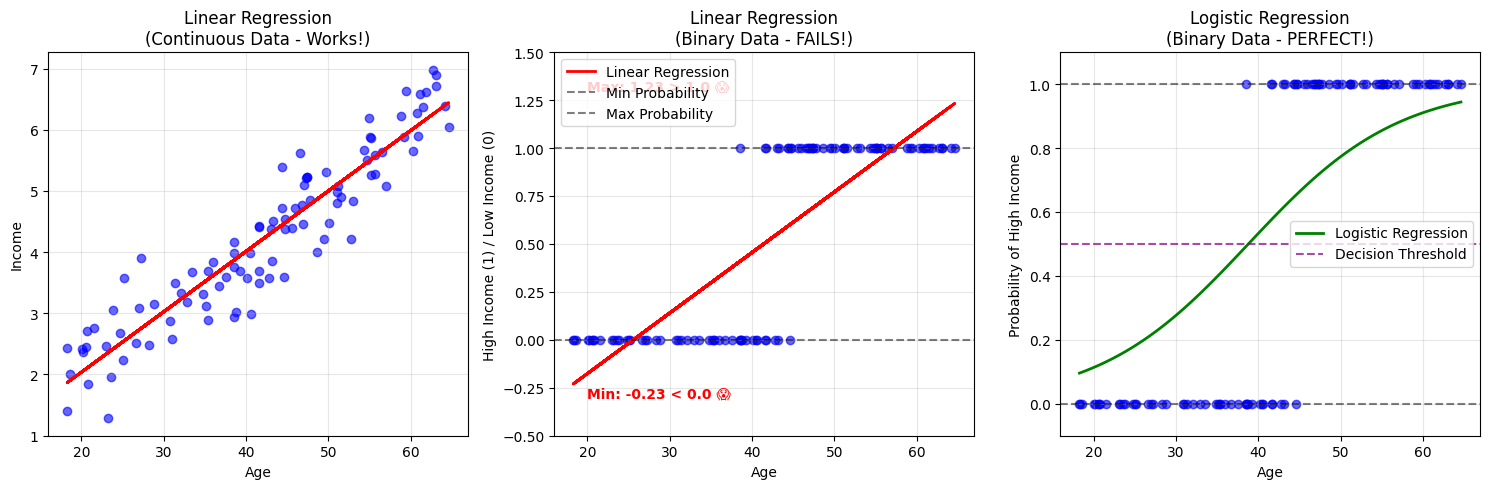

🔍 What We Learned:
• Linear regression can predict impossible probabilities (< 0 or > 1)
• Logistic regression always outputs valid probabilities [0, 1]
• The S-shaped curve fits binary data much better!
• Decision threshold at 0.5: probability > 0.5 → Class 1, else Class 0


In [25]:
# Demonstration: Why Linear Regression Fails for Classification
from sklearn.linear_model import LinearRegression, LogisticRegression

# Create age vs income data (similar to the attached files)
np.random.seed(1234)
age = np.random.uniform(18, 65, 100)
income = np.random.normal((age/10), 0.5)

# Convert to binary: 1 if income > 4, 0 otherwise
income_binary = (income > 4).astype(int)

# Reshape for sklearn
age_reshaped = age.reshape(-1, 1)

plt.figure(figsize=(15, 5))

# Plot 1: Original continuous data with linear regression
plt.subplot(1, 3, 1)
plt.scatter(age, income, alpha=0.6, color='blue')
lin_reg = LinearRegression()
lin_reg.fit(age_reshaped, income)
plt.plot(age, lin_reg.predict(age_reshaped), color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Linear Regression\n(Continuous Data - Works!)')
plt.grid(True, alpha=0.3)

# Plot 2: Binary data with linear regression (PROBLEM!)
plt.subplot(1, 3, 2)
plt.scatter(age, income_binary, alpha=0.6, color='blue')
lin_reg_binary = LinearRegression()
lin_reg_binary.fit(age_reshaped, income_binary)
linear_pred = lin_reg_binary.predict(age_reshaped)
plt.plot(age, linear_pred, color='red', linewidth=2, label='Linear Regression')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Min Probability')
plt.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='Max Probability')
plt.xlabel('Age')
plt.ylabel('High Income (1) / Low Income (0)')
plt.title('Linear Regression\n(Binary Data - FAILS!)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.5, 1.5)

# Highlight problems
min_pred = linear_pred.min()
max_pred = linear_pred.max()
plt.text(20, 1.3, f'Max: {max_pred:.2f} > 1.0 😱', fontsize=10, color='red', weight='bold')
plt.text(20, -0.3, f'Min: {min_pred:.2f} < 0.0 😱', fontsize=10, color='red', weight='bold')

# Plot 3: Binary data with logistic regression (SOLUTION!)
plt.subplot(1, 3, 3)
plt.scatter(age, income_binary, alpha=0.6, color='blue')

# Fit logistic regression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(age_reshaped, income_binary)

# Create smooth curve for visualization
age_smooth = np.linspace(age.min(), age.max(), 100).reshape(-1, 1)
prob_pred = log_reg.predict_proba(age_smooth)[:, 1]  # Get probability of class 1

plt.plot(age_smooth, prob_pred, color='green', linewidth=2, label='Logistic Regression')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.axhline(y=1, color='black', linestyle='--', alpha=0.5)
plt.axhline(y=0.5, color='purple', linestyle='--', alpha=0.7, label='Decision Threshold')
plt.xlabel('Age')
plt.ylabel('Probability of High Income')
plt.title('Logistic Regression\n(Binary Data - PERFECT!)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

print("🔍 What We Learned:")
print("• Linear regression can predict impossible probabilities (< 0 or > 1)")
print("• Logistic regression always outputs valid probabilities [0, 1]")
print("• The S-shaped curve fits binary data much better!")
print("• Decision threshold at 0.5: probability > 0.5 → Class 1, else Class 0")

# 4. The Sigmoid Function 📈

## The Mathematical Heart of Logistic Regression

The **sigmoid function** (also called logistic function) is the secret sauce that makes logistic regression work! 

### The Formula

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Where:
- **z = β₀ + β₁x₁ + β₂x₂ + ...** (linear combination of features)
- **σ(z)** is the probability output (between 0 and 1)
- **e** is Euler's number (≈ 2.718)

### Why the Sigmoid Function is Perfect for Classification

🎯 **Always outputs between 0 and 1** - Perfect for probabilities!  
📈 **S-shaped curve** - Smooth transition between classes  
🔄 **Symmetric around 0.5** - Natural decision boundary  
⚡ **Mathematically convenient** - Nice properties for optimization  

### Key Properties

- When **z → +∞**: σ(z) → 1 (high confidence for Class 1)
- When **z → -∞**: σ(z) → 0 (high confidence for Class 0)  
- When **z = 0**: σ(z) = 0.5 (maximum uncertainty)
- **Steep in middle, flat at extremes** - Good for decision making

Let's explore the sigmoid function visually and interactively!

C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3925872371.py:135: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3925872371.py:135: UserWarning: Glyph 128273 (\N{KEY}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Anarchy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128273 (\N{KEY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Anarchy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-

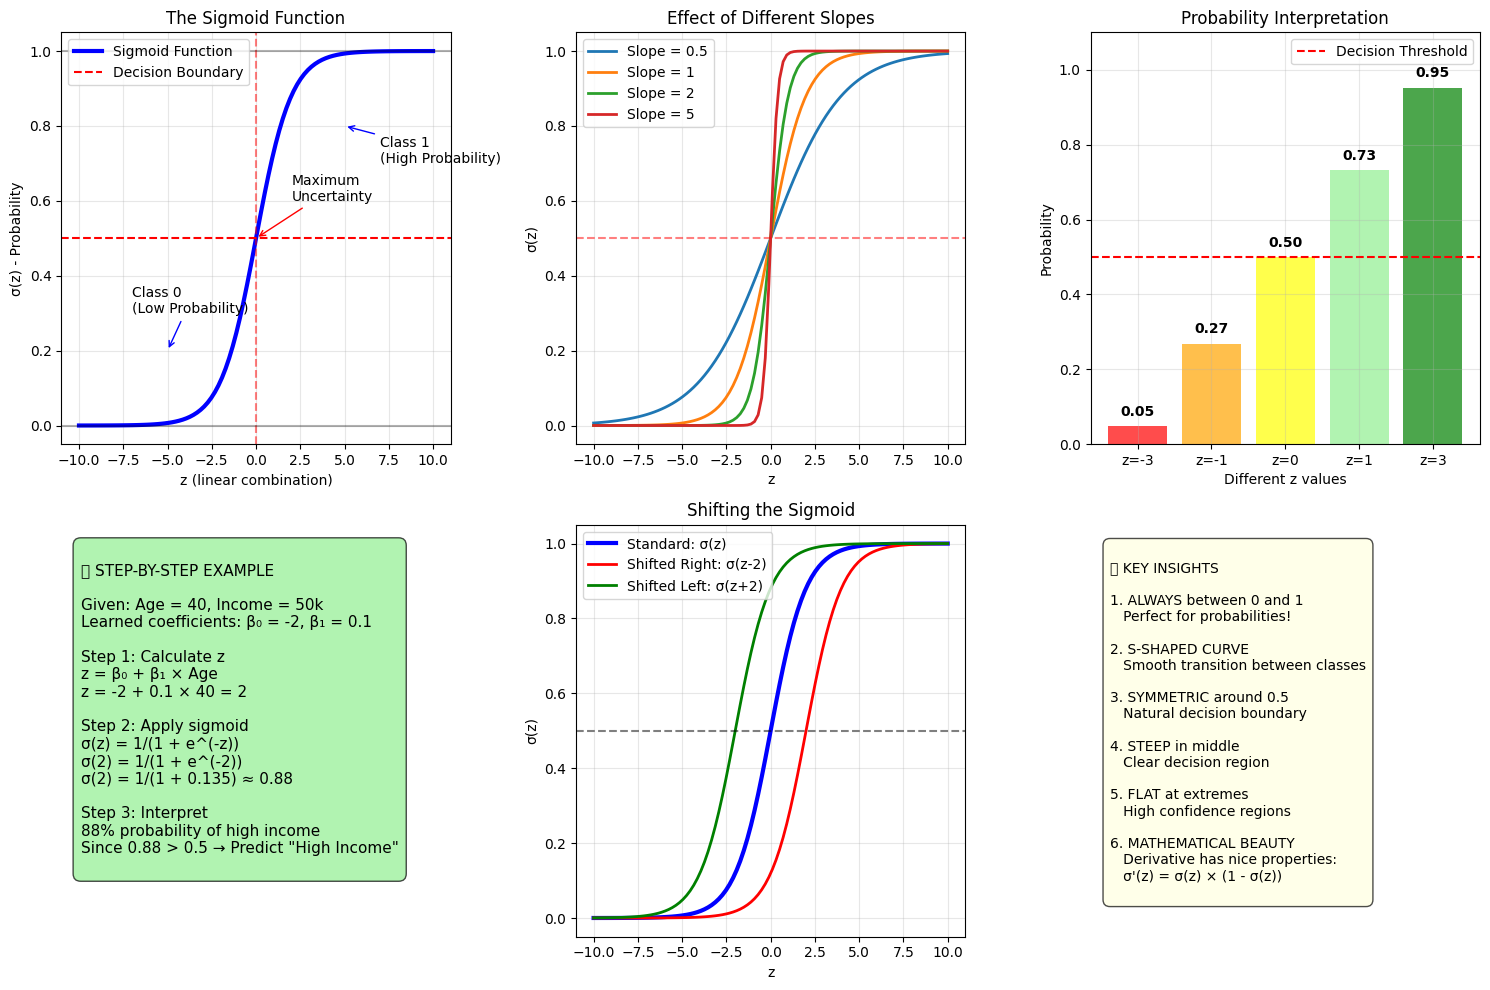

🧮 Try Your Own Calculation!
Input z = 1.5
Sigmoid output σ(1.5) = 0.8176
Interpretation: 81.8% probability of Class 1
Prediction: Class 1 (threshold = 0.5)

💡 The sigmoid function transforms any real number into a valid probability!


In [26]:
# Let's explore the Sigmoid Function!

def sigmoid(z):
    """The sigmoid/logistic function"""
    return 1 / (1 + np.exp(-z))

# Create range of z values
z = np.linspace(-10, 10, 100)
sigmoid_output = sigmoid(z)

plt.figure(figsize=(15, 10))

# Plot 1: The Classic Sigmoid Curve
plt.subplot(2, 3, 1)
plt.plot(z, sigmoid_output, 'b-', linewidth=3, label='Sigmoid Function')
plt.axhline(y=0.5, color='red', linestyle='--', label='Decision Boundary')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=1, color='black', linestyle='-', alpha=0.3)
plt.xlabel('z (linear combination)')
plt.ylabel('σ(z) - Probability')
plt.title('The Sigmoid Function')
plt.grid(True, alpha=0.3)
plt.legend()

# Add annotations
plt.annotate('Class 0\n(Low Probability)', xy=(-5, 0.2), xytext=(-7, 0.3),
            arrowprops=dict(arrowstyle='->', color='blue'), fontsize=10)
plt.annotate('Class 1\n(High Probability)', xy=(5, 0.8), xytext=(7, 0.7),
            arrowprops=dict(arrowstyle='->', color='blue'), fontsize=10)
plt.annotate('Maximum\nUncertainty', xy=(0, 0.5), xytext=(2, 0.6),
            arrowprops=dict(arrowstyle='->', color='red'), fontsize=10)

# Plot 2: Effect of different slopes
plt.subplot(2, 3, 2)
for slope in [0.5, 1, 2, 5]:
    plt.plot(z, sigmoid(slope * z), linewidth=2, label=f'Slope = {slope}')
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.title('Effect of Different Slopes')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Probability interpretation
plt.subplot(2, 3, 3)
z_points = [-3, -1, 0, 1, 3]
prob_points = [sigmoid(z_point) for z_point in z_points]
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']

bars = plt.bar(range(len(z_points)), prob_points, color=colors, alpha=0.7)
plt.axhline(y=0.5, color='red', linestyle='--', label='Decision Threshold')
plt.xlabel('Different z values')
plt.ylabel('Probability')
plt.title('Probability Interpretation')
plt.xticks(range(len(z_points)), [f'z={z}' for z in z_points])

# Add probability values on bars
for i, (bar, prob) in enumerate(zip(bars, prob_points)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{prob:.2f}', ha='center', va='bottom', fontweight='bold')

plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Step-by-step calculation example
plt.subplot(2, 3, 4)
plt.axis('off')
example_text = """
📝 STEP-BY-STEP EXAMPLE

Given: Age = 40, Income = 50k
Learned coefficients: β₀ = -2, β₁ = 0.1

Step 1: Calculate z
z = β₀ + β₁ × Age
z = -2 + 0.1 × 40 = 2

Step 2: Apply sigmoid
σ(z) = 1/(1 + e^(-z))
σ(2) = 1/(1 + e^(-2))
σ(2) = 1/(1 + 0.135) ≈ 0.88

Step 3: Interpret
88% probability of high income
Since 0.88 > 0.5 → Predict "High Income"
"""

plt.text(0.05, 0.95, example_text, fontsize=11, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.7))

# Plot 5: Interactive-style demonstration
plt.subplot(2, 3, 5)
# Show multiple sigmoid curves with different parameters
plt.plot(z, sigmoid(z), 'b-', linewidth=3, label='Standard: σ(z)')
plt.plot(z, sigmoid(z - 2), 'r-', linewidth=2, label='Shifted Right: σ(z-2)')
plt.plot(z, sigmoid(z + 2), 'g-', linewidth=2, label='Shifted Left: σ(z+2)')
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.title('Shifting the Sigmoid')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Key insights
plt.subplot(2, 3, 6)
plt.axis('off')
insights_text = """
🔑 KEY INSIGHTS

1. ALWAYS between 0 and 1
   Perfect for probabilities!

2. S-SHAPED CURVE
   Smooth transition between classes

3. SYMMETRIC around 0.5
   Natural decision boundary

4. STEEP in middle
   Clear decision region

5. FLAT at extremes
   High confidence regions

6. MATHEMATICAL BEAUTY
   Derivative has nice properties:
   σ'(z) = σ(z) × (1 - σ(z))
"""

plt.text(0.05, 0.95, insights_text, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.7))

plt.tight_layout()
plt.show()

# Interactive calculation
print("🧮 Try Your Own Calculation!")
print("=" * 40)
z_input = 1.5  # You can change this value
probability = sigmoid(z_input)
prediction = "Class 1" if probability > 0.5 else "Class 0"

print(f"Input z = {z_input}")
print(f"Sigmoid output σ({z_input}) = {probability:.4f}")
print(f"Interpretation: {probability*100:.1f}% probability of Class 1")
print(f"Prediction: {prediction} (threshold = 0.5)")
print("\n💡 The sigmoid function transforms any real number into a valid probability!")

# 5. Maximum Likelihood Estimation (MLE) and Logistic Regression 🎲

## The Statistical Foundation

**Maximum Likelihood Estimation** is the statistical principle behind logistic regression. Think of it as asking: *"What parameter values make our observed data most likely to have occurred?"*

### Understanding MLE with a Simple Example 🪙

Imagine flipping a coin 100 times and getting 55 heads. What's the most likely probability of heads for this coin?

- If coin was fair (p=0.5): Somewhat likely, but not optimal
- If p=0.55: This maximizes the likelihood of observing exactly 55 heads!
- If p=0.9: Very unlikely to get only 55 heads

### MLE Intuition

🎯 **Goal**: Find parameters that make our observed data most probable  
📊 **Method**: Maximize the likelihood function  
🧮 **Math**: Often use log-likelihood for easier computation  
⚡ **Result**: Optimal parameters for our model  

### From Coin Flips to Logistic Regression

In logistic regression, instead of coin flips, we have:
- **Observations**: Features (X) and binary outcomes (y)
- **Parameters**: Coefficients (β₀, β₁, β₂, ...)
- **Goal**: Find β values that maximize probability of observing our data

### The Likelihood Function for Logistic Regression

For each observation i:
- **πᵢ = P(yᵢ = 1 | xᵢ)** = sigmoid(β₀ + β₁xᵢ)
- **Likelihood** = π^y × (1-π)^(1-y)

Combined likelihood: **L(β) = ∏ᵢ πᵢ^yᵢ × (1-πᵢ)^(1-yᵢ)**

Let's see MLE in action!

🪙 COIN FLIP MLE EXAMPLE


C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\826677722.py:178: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\826677722.py:178: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\826677722.py:178: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Anarchy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) 

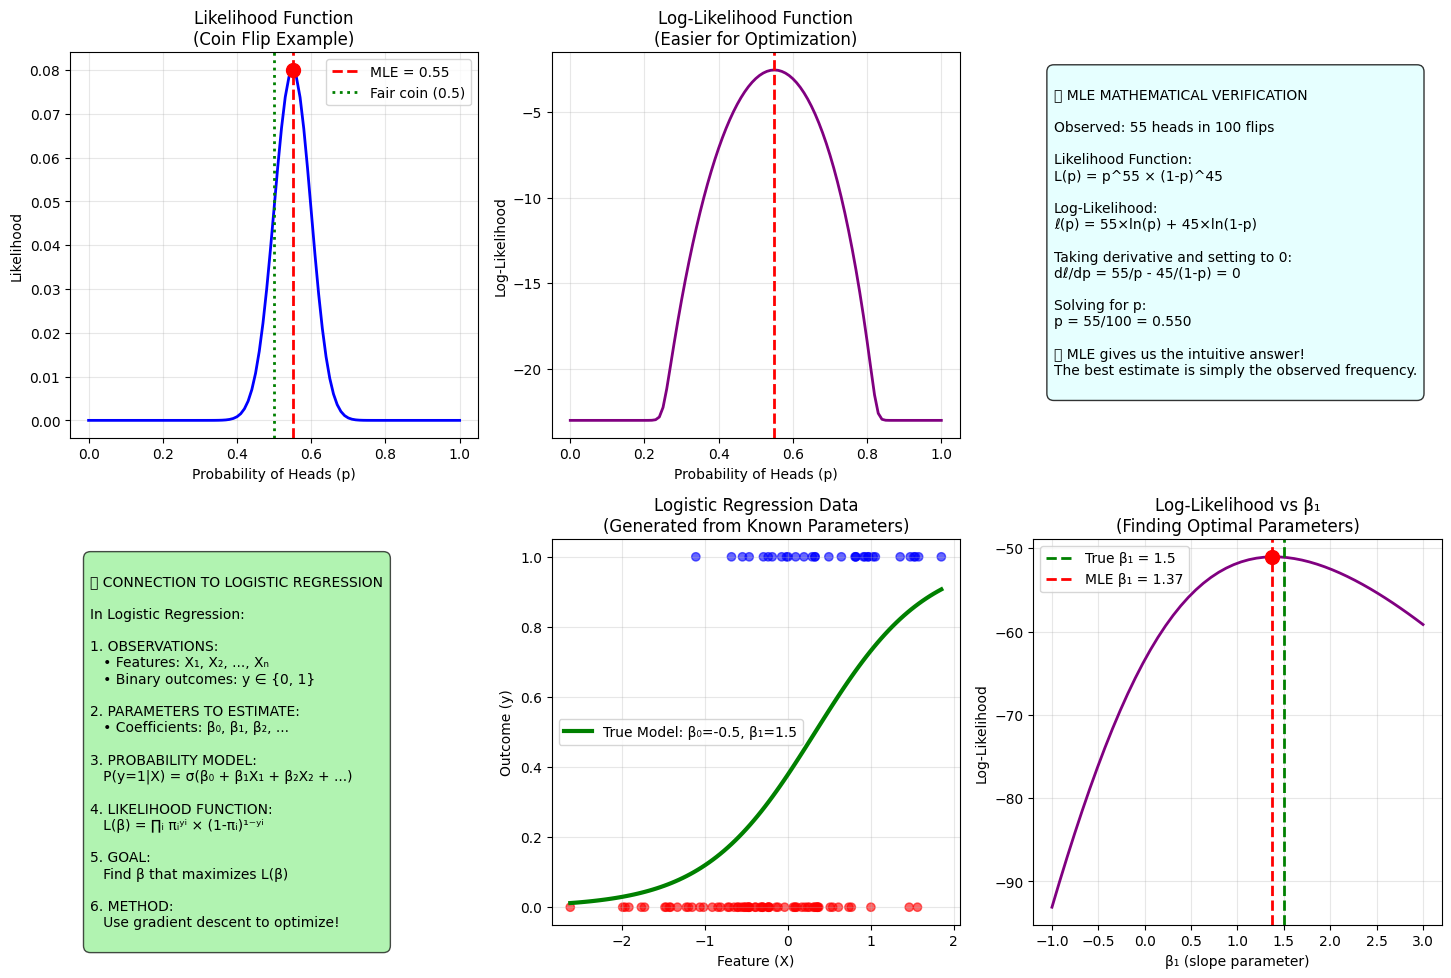


🎯 MLE Results:
Coin flip: Optimal p = 0.550
Logistic regression: True β₁ = 1.5, MLE β₁ ≈ 1.367

💡 Key Insight: MLE finds parameters that make our observed data most likely!
This is exactly what logistic regression does - it finds the β coefficients
that maximize the probability of observing our training data.


In [ ]:
# Demonstrating Maximum Likelihood Estimation
from scipy.stats import binom
from scipy.optimize import minimize_scalar

# === PART 1: Coin Flip MLE Example ===
print("🪙 COIN FLIP MLE EXAMPLE")
print("=" * 50)

# Observed data: 55 heads out of 100 flips
n_flips = 100
n_heads = 55

# Test different probability values
p_values = np.linspace(0, 1, 101)
likelihoods = []

# Calculate likelihood for each probability
for p in p_values:
    # Binomial likelihood: P(55 heads | 100 flips, probability p)
    likelihood = binom.pmf(n_heads, n_flips, p)
    likelihoods.append(likelihood)

# Convert to numpy array
likelihoods = np.array(likelihoods)

# Plot the likelihood function
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(p_values, likelihoods, 'b-', linewidth=2)
plt.axvline(x=n_heads/n_flips, color='red', linestyle='--', linewidth=2, 
           label=f'MLE = {n_heads/n_flips:.2f}')
plt.axvline(x=0.5, color='green', linestyle=':', linewidth=2, label='Fair coin (0.5)')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Likelihood')
plt.title('Likelihood Function\n(Coin Flip Example)')
plt.legend()
plt.grid(True, alpha=0.3)

# Highlight maximum
max_idx = np.argmax(likelihoods)
plt.plot(p_values[max_idx], likelihoods[max_idx], 'ro', markersize=10)

# === PART 2: Log-Likelihood (easier to work with) ===
plt.subplot(2, 3, 2)
log_likelihoods = np.log(likelihoods + 1e-10)  # Add small value to avoid log(0)
plt.plot(p_values, log_likelihoods, 'purple', linewidth=2)
plt.axvline(x=n_heads/n_flips, color='red', linestyle='--', linewidth=2)
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood Function\n(Easier for Optimization)')
plt.grid(True, alpha=0.3)

# === PART 3: MLE Derivation Verification ===
plt.subplot(2, 3, 3)
plt.axis('off')
derivation_text = f"""
📝 MLE MATHEMATICAL VERIFICATION

Observed: {n_heads} heads in {n_flips} flips

Likelihood Function:
L(p) = p^{n_heads} × (1-p)^{n_flips-n_heads}

Log-Likelihood:
ℓ(p) = {n_heads}×ln(p) + {n_flips-n_heads}×ln(1-p)

Taking derivative and setting to 0:
dℓ/dp = {n_heads}/p - {n_flips-n_heads}/(1-p) = 0

Solving for p:
p = {n_heads}/{n_flips} = {n_heads/n_flips:.3f}

✅ MLE gives us the intuitive answer!
The best estimate is simply the observed frequency.
"""

plt.text(0.05, 0.95, derivation_text, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcyan", alpha=0.8))

# === PART 4: Connection to Logistic Regression ===
plt.subplot(2, 3, 4)
plt.axis('off')
connection_text = """
CONNECTION TO LOGISTIC REGRESSION

In Logistic Regression:

1. OBSERVATIONS: 
   • Features: X₁, X₂, ..., Xₙ
   • Binary outcomes: y ∈ {0, 1}

2. PARAMETERS TO ESTIMATE:
   • Coefficients: β₀, β₁, β₂, ...

3. PROBABILITY MODEL:
   P(y=1|X) = σ(β₀ + β₁X₁ + β₂X₂ + ...)

4. LIKELIHOOD FUNCTION:
   L(β) = ∏ᵢ πᵢʸⁱ × (1-πᵢ)¹⁻ʸⁱ

5. GOAL:
   Find β that maximizes L(β)
   
6. METHOD:
   Use gradient descent to optimize!
"""

plt.text(0.05, 0.95, connection_text, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.7))

# === PART 5: Logistic Regression MLE Simulation ===
plt.subplot(2, 3, 5)

# Generate simple logistic regression data
np.random.seed(42)
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Feature
true_beta0, true_beta1 = -0.5, 1.5     # True parameters

# Generate y using true logistic model
z_true = true_beta0 + true_beta1 * x
p_true = sigmoid(z_true)
y = np.random.binomial(1, p_true)

# Plot the data
colors = ['red' if yi == 0 else 'blue' for yi in y]
plt.scatter(x, y, c=colors, alpha=0.6)

# Overlay true probability curve
x_smooth = np.linspace(x.min(), x.max(), 100)
z_smooth = true_beta0 + true_beta1 * x_smooth
p_smooth = sigmoid(z_smooth)
plt.plot(x_smooth, p_smooth, 'green', linewidth=3, 
         label=f'True Model: β₀={true_beta0}, β₁={true_beta1}')

plt.xlabel('Feature (X)')
plt.ylabel('Outcome (y)')
plt.title('Logistic Regression Data\n(Generated from Known Parameters)')
plt.legend()
plt.grid(True, alpha=0.3)

# === PART 6: Log-Likelihood Calculation Example ===
plt.subplot(2, 3, 6)

# Calculate log-likelihood for different beta1 values (keeping beta0 fixed)
beta0_test = -0.5
beta1_values = np.linspace(-1, 3, 50)
log_likelihoods_lr = []

for beta1_test in beta1_values:
    z_test = beta0_test + beta1_test * x
    p_test = sigmoid(z_test)
    
    # Calculate log-likelihood
    # ℓ = Σ[y×ln(p) + (1-y)×ln(1-p)]
    log_likelihood = np.sum(y * np.log(p_test + 1e-10) + 
                           (1 - y) * np.log(1 - p_test + 1e-10))
    log_likelihoods_lr.append(log_likelihood)

plt.plot(beta1_values, log_likelihoods_lr, 'purple', linewidth=2)
plt.axvline(x=true_beta1, color='green', linestyle='--', linewidth=2, 
           label=f'True β₁ = {true_beta1}')

# Find and mark maximum
max_idx = np.argmax(log_likelihoods_lr)
mle_beta1 = beta1_values[max_idx]
plt.axvline(x=mle_beta1, color='red', linestyle='--', linewidth=2, 
           label=f'MLE β₁ = {mle_beta1:.2f}')
plt.plot(mle_beta1, log_likelihoods_lr[max_idx], 'ro', markersize=10)

plt.xlabel('β₁ (slope parameter)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs β₁\n(Finding Optimal Parameters)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 MLE Results:")
print(f"Coin flip: Optimal p = {n_heads/n_flips:.3f}")
print(f"Logistic regression: True β₁ = {true_beta1}, MLE β₁ ≈ {mle_beta1:.3f}")
print(f"\n💡 Key Insight: MLE finds parameters that make our observed data most likely!")
print("This is exactly what logistic regression does - it finds the β coefficients")
print("that maximize the probability of observing our training data.")

# 6. Gradient Descent: Concept and Visualization ⛰️

## Finding the Optimal Solution

Once we have our log-likelihood function, we need to find the parameter values that maximize it. This is where **Gradient Descent** comes in!

### The Mountain Climbing Analogy 🏔️

Imagine you're on a foggy mountain and want to reach the top (maximum), but you can only see a few feet around you:

1. **Feel the slope** under your feet (calculate gradient)
2. **Take a step** in the steepest uphill direction  
3. **Repeat** until you reach the peak

For **minimization** problems (most common), we flip this and go downhill to find the valley bottom.

### Gradient Descent Algorithm

🎯 **Goal**: Find parameters that minimize the cost function (or maximize log-likelihood)  
📐 **Gradient**: The slope/derivative at current point  
👣 **Step Size (α)**: How big steps to take (learning rate)  
🔄 **Iteration**: Repeat until convergence  

### The Algorithm Steps

1. **Initialize**: Start with random parameter values
2. **Calculate Gradient**: Find slope at current point
3. **Update Parameters**: θ = θ - α × ∇f(θ)
4. **Check Convergence**: Stop if change is very small
5. **Repeat**: Go back to step 2

### Important Considerations

⚠️ **Learning Rate**: Too big → overshoot, Too small → slow convergence  
🎯 **Local vs Global Minimum**: May get stuck in local minimum  
🔄 **Multiple Runs**: Often run multiple times with different starting points  
📊 **Convergence**: Algorithm stops when improvement becomes negligible  

Let's visualize gradient descent in action!

Converged after 19 iterations


C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3668479398.py:350: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3668479398.py:350: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3668479398.py:350: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3668479398.py:350: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3668479398.py:350: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3668479398.py:350: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\A

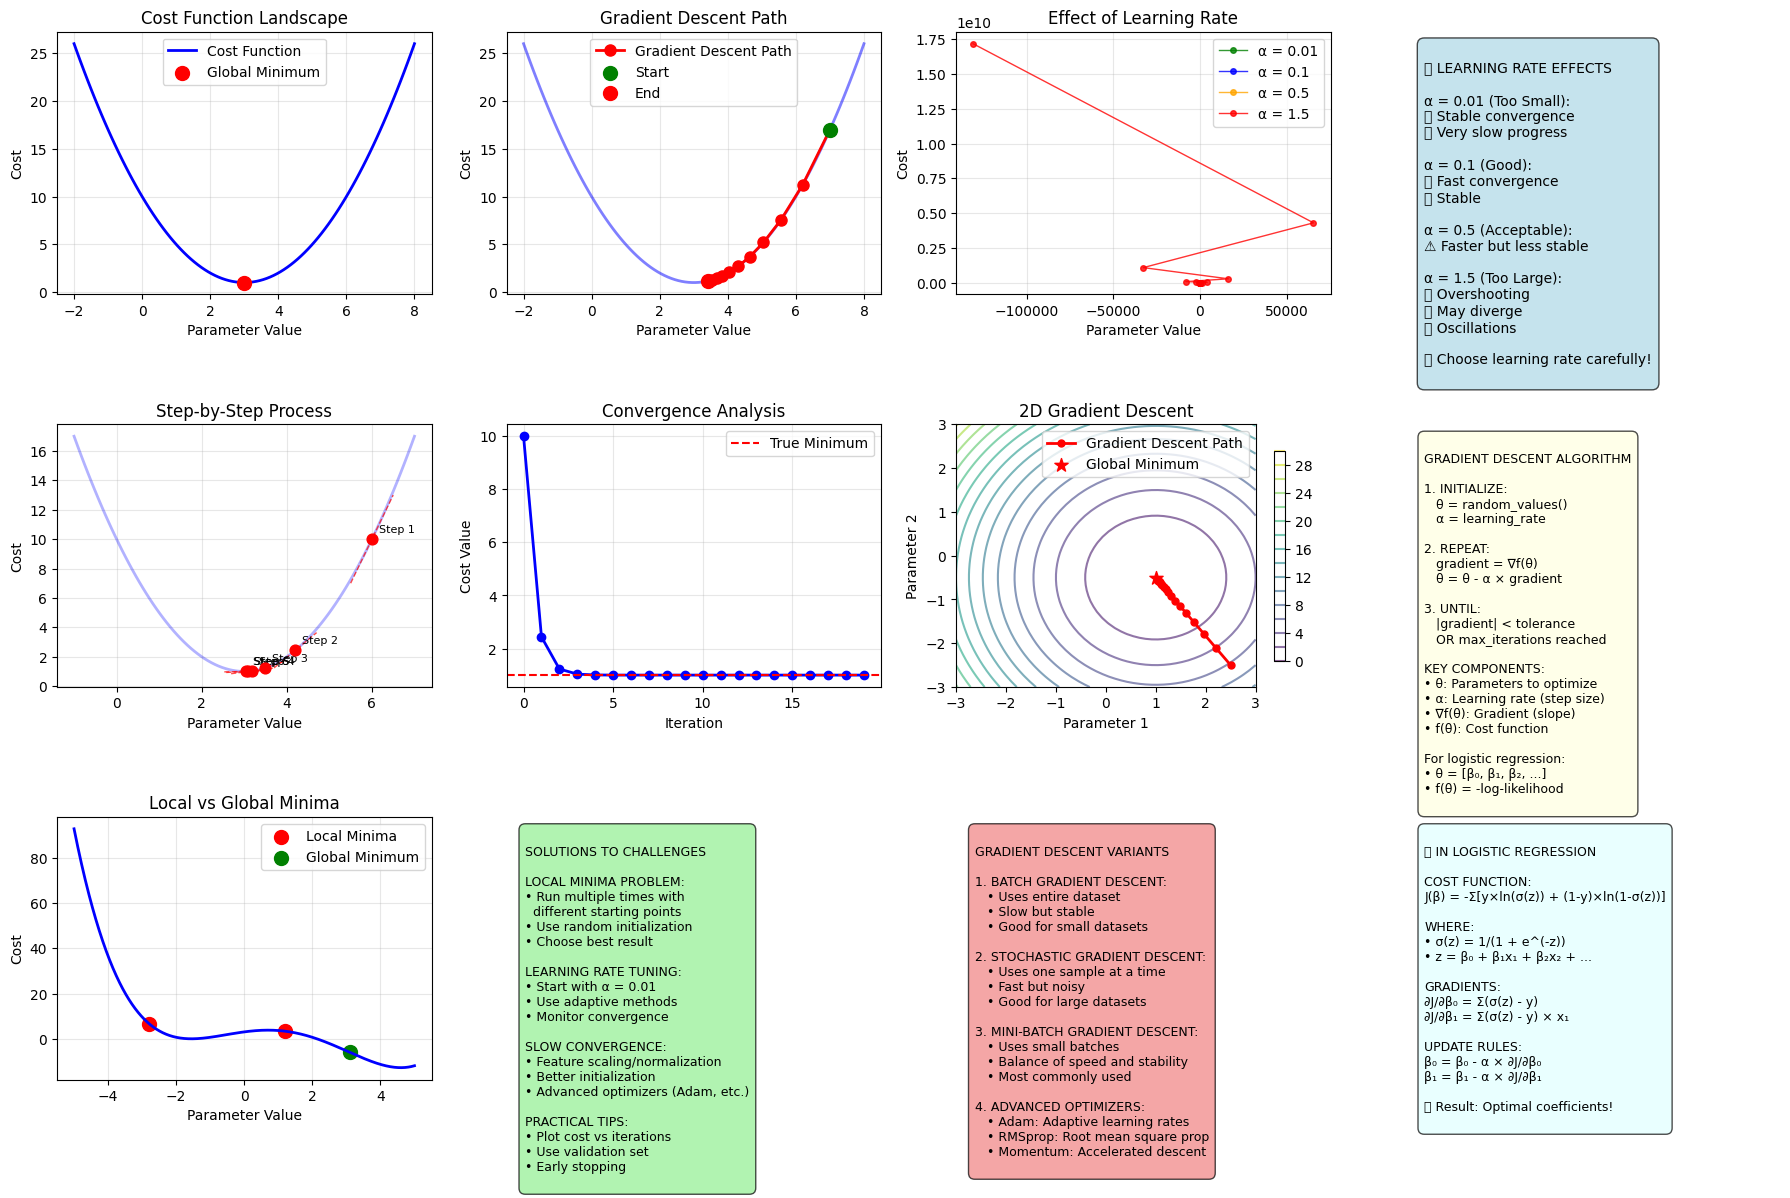

🏔️ Gradient Descent Summary:
• Iterative optimization algorithm
• Follows the slope to find minimum/maximum
• Learning rate controls step size
• May get stuck in local minima
• Used in logistic regression to find optimal coefficients

💡 Next: Let's see this in action with real data!


In [28]:
# Gradient Descent Visualization and Implementation

# === PART 1: Simple Cost Function Visualization ===
def simple_cost_function(x):
    """A simple quadratic cost function for demonstration"""
    return (x - 3)**2 + 1

def cost_derivative(x):
    """Derivative of the cost function"""
    return 2 * (x - 3)

# Create function to visualize
x_range = np.linspace(-2, 8, 100)
y_range = simple_cost_function(x_range)

plt.figure(figsize=(18, 12))

# Plot 1: The cost function landscape
plt.subplot(3, 4, 1)
plt.plot(x_range, y_range, 'b-', linewidth=2, label='Cost Function')
plt.scatter([3], [simple_cost_function(3)], color='red', s=100, zorder=5, label='Global Minimum')
plt.xlabel('Parameter Value')
plt.ylabel('Cost')
plt.title('Cost Function Landscape')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Gradient Descent Animation Steps
plt.subplot(3, 4, 2)
plt.plot(x_range, y_range, 'b-', linewidth=2, alpha=0.5)

# Simulate gradient descent
start_x = 7  # Starting point
learning_rate = 0.1
current_x = start_x
path_x = [current_x]
path_y = [simple_cost_function(current_x)]

# Perform several gradient descent steps
for step in range(10):
    gradient = cost_derivative(current_x)
    current_x = current_x - learning_rate * gradient
    path_x.append(current_x)
    path_y.append(simple_cost_function(current_x))

# Plot the path
plt.plot(path_x, path_y, 'ro-', markersize=8, linewidth=2, label='Gradient Descent Path')
plt.scatter([start_x], [simple_cost_function(start_x)], color='green', s=100, 
           label='Start', zorder=5)
plt.scatter([path_x[-1]], [path_y[-1]], color='red', s=100, 
           label='End', zorder=5)
plt.xlabel('Parameter Value')
plt.ylabel('Cost')
plt.title('Gradient Descent Path')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Effect of different learning rates
plt.subplot(3, 4, 3)
plt.plot(x_range, y_range, 'b-', linewidth=2, alpha=0.3)

learning_rates = [0.01, 0.1, 0.5, 1.5]
colors = ['green', 'blue', 'orange', 'red']

for lr, color in zip(learning_rates, colors):
    current_x = 7
    path_x = [current_x]
    
    for _ in range(15):
        gradient = cost_derivative(current_x)
        current_x = current_x - lr * gradient
        path_x.append(current_x)
        if abs(gradient) < 1e-6:  # Convergence check
            break
    
    path_y = [simple_cost_function(x) for x in path_x]
    plt.plot(path_x, path_y, 'o-', color=color, markersize=4, 
             linewidth=1, label=f'α = {lr}', alpha=0.8)

plt.xlabel('Parameter Value')
plt.ylabel('Cost')
plt.title('Effect of Learning Rate')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Learning rate comparison table
plt.subplot(3, 4, 4)
plt.axis('off')
lr_comparison = """
📊 LEARNING RATE EFFECTS

α = 0.01 (Too Small):
✅ Stable convergence
❌ Very slow progress

α = 0.1 (Good):
✅ Fast convergence
✅ Stable

α = 0.5 (Acceptable):
⚠️ Faster but less stable

α = 1.5 (Too Large):
❌ Overshooting
❌ May diverge
❌ Oscillations

🎯 Choose learning rate carefully!
"""

plt.text(0.05, 0.95, lr_comparison, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.7))

# === PART 2: Real Gradient Descent Implementation ===
def gradient_descent_demo(cost_func, gradient_func, start_x, learning_rate, max_iterations=100):
    """Implement gradient descent and return the path"""
    path = [start_x]
    current_x = start_x
    
    for i in range(max_iterations):
        gradient = gradient_func(current_x)
        current_x = current_x - learning_rate * gradient
        path.append(current_x)
        
        # Convergence check
        if abs(gradient) < 1e-6:
            print(f"Converged after {i+1} iterations")
            break
    
    return path

# Plot 5: Step-by-step gradient descent
plt.subplot(3, 4, 5)
x_range = np.linspace(-1, 7, 100)
y_range = simple_cost_function(x_range)
plt.plot(x_range, y_range, 'b-', linewidth=2, alpha=0.3)

# Run gradient descent
path = gradient_descent_demo(simple_cost_function, cost_derivative, 
                           start_x=6, learning_rate=0.3, max_iterations=8)

# Show first few steps clearly
for i in range(min(6, len(path)-1)):
    x_curr = path[i]
    y_curr = simple_cost_function(x_curr)
    
    # Draw tangent line (gradient)
    gradient = cost_derivative(x_curr)
    tangent_x = np.linspace(x_curr-0.5, x_curr+0.5, 10)
    tangent_y = y_curr + gradient * (tangent_x - x_curr)
    
    plt.plot(tangent_x, tangent_y, 'r--', alpha=0.7, linewidth=1)
    plt.scatter([x_curr], [y_curr], color='red', s=60, zorder=5)
    plt.annotate(f'Step {i+1}', (x_curr, y_curr), xytext=(5, 5), 
                textcoords='offset points', fontsize=8)

plt.xlabel('Parameter Value')
plt.ylabel('Cost')
plt.title('Step-by-Step Process')
plt.grid(True, alpha=0.3)

# Plot 6: Convergence analysis
plt.subplot(3, 4, 6)
path = gradient_descent_demo(simple_cost_function, cost_derivative, 
                           start_x=6, learning_rate=0.3, max_iterations=20)
costs = [simple_cost_function(x) for x in path]

plt.plot(range(len(costs)), costs, 'bo-', linewidth=2, markersize=6)
plt.axhline(y=simple_cost_function(3), color='red', linestyle='--', 
           label='True Minimum')
plt.xlabel('Iteration')
plt.ylabel('Cost Value')
plt.title('Convergence Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

# === PART 3: Multi-dimensional Gradient Descent Concept ===
plt.subplot(3, 4, 7)
# Create a 2D cost function visualization
x1 = np.linspace(-3, 3, 50)
x2 = np.linspace(-3, 3, 50)
X1, X2 = np.meshgrid(x1, x2)
Z = (X1 - 1)**2 + (X2 + 0.5)**2  # Simple 2D quadratic

contour = plt.contour(X1, X2, Z, levels=15, alpha=0.6)
plt.colorbar(contour, shrink=0.8)

# Simulate 2D gradient descent path
path_2d_x1 = [2.5]
path_2d_x2 = [-2.5]
lr_2d = 0.1

for _ in range(15):
    grad_x1 = 2 * (path_2d_x1[-1] - 1)
    grad_x2 = 2 * (path_2d_x2[-1] + 0.5)
    
    new_x1 = path_2d_x1[-1] - lr_2d * grad_x1
    new_x2 = path_2d_x2[-1] - lr_2d * grad_x2
    
    path_2d_x1.append(new_x1)
    path_2d_x2.append(new_x2)

plt.plot(path_2d_x1, path_2d_x2, 'ro-', linewidth=2, markersize=5, 
         label='Gradient Descent Path')
plt.scatter([1], [-0.5], color='red', s=100, marker='*', 
           label='Global Minimum', zorder=5)
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
plt.title('2D Gradient Descent')
plt.legend()

# Plot 8: Algorithm pseudocode
plt.subplot(3, 4, 8)
plt.axis('off')
algorithm_text = """
GRADIENT DESCENT ALGORITHM

1. INITIALIZE:
   θ = random_values()
   α = learning_rate
   
2. REPEAT:
   gradient = ∇f(θ)
   θ = θ - α × gradient
   
3. UNTIL:
   |gradient| < tolerance
   OR max_iterations reached

KEY COMPONENTS:
• θ: Parameters to optimize
• α: Learning rate (step size)
• ∇f(θ): Gradient (slope)
• f(θ): Cost function

For logistic regression:
• θ = [β₀, β₁, β₂, ...]
• f(θ) = -log-likelihood
"""

plt.text(0.05, 0.95, algorithm_text, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.7))

# === PART 4: Common Challenges ===
plt.subplot(3, 4, 9)
# Create a function with local minima
x_complex = np.linspace(-5, 5, 1000)
y_complex = 0.1 * x_complex**4 - 0.5 * x_complex**3 - x_complex**2 + 2 * x_complex + 3

plt.plot(x_complex, y_complex, 'b-', linewidth=2)
plt.scatter([-2.8, 1.2], [0.1 * (-2.8)**4 - 0.5 * (-2.8)**3 - (-2.8)**2 + 2 * (-2.8) + 3,
                          0.1 * (1.2)**4 - 0.5 * (1.2)**3 - (1.2)**2 + 2 * (1.2) + 3], 
           color='red', s=100, label='Local Minima')
plt.scatter([3.1], [0.1 * (3.1)**4 - 0.5 * (3.1)**3 - (3.1)**2 + 2 * (3.1) + 3], 
           color='green', s=100, label='Global Minimum')
plt.xlabel('Parameter Value')
plt.ylabel('Cost')
plt.title('Local vs Global Minima')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 10: Solutions to challenges
plt.subplot(3, 4, 10)
plt.axis('off')
solutions_text = """
SOLUTIONS TO CHALLENGES

LOCAL MINIMA PROBLEM:
• Run multiple times with 
  different starting points
• Use random initialization
• Choose best result

LEARNING RATE TUNING:
• Start with α = 0.01
• Use adaptive methods
• Monitor convergence

SLOW CONVERGENCE:
• Feature scaling/normalization
• Better initialization
• Advanced optimizers (Adam, etc.)

PRACTICAL TIPS:
• Plot cost vs iterations
• Use validation set
• Early stopping
"""

plt.text(0.05, 0.95, solutions_text, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.7))

# Plot 11: Gradient descent variants
plt.subplot(3, 4, 11)
plt.axis('off')
variants_text = """
GRADIENT DESCENT VARIANTS

1. BATCH GRADIENT DESCENT:
   • Uses entire dataset
   • Slow but stable
   • Good for small datasets

2. STOCHASTIC GRADIENT DESCENT:
   • Uses one sample at a time
   • Fast but noisy
   • Good for large datasets

3. MINI-BATCH GRADIENT DESCENT:
   • Uses small batches
   • Balance of speed and stability
   • Most commonly used

4. ADVANCED OPTIMIZERS:
   • Adam: Adaptive learning rates
   • RMSprop: Root mean square prop
   • Momentum: Accelerated descent
"""

plt.text(0.05, 0.95, variants_text, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcoral", alpha=0.7))

# Plot 12: Connection to logistic regression
plt.subplot(3, 4, 12)
plt.axis('off')
connection_text = """
🔗 IN LOGISTIC REGRESSION

COST FUNCTION:
J(β) = -Σ[y×ln(σ(z)) + (1-y)×ln(1-σ(z))]

WHERE:
• σ(z) = 1/(1 + e^(-z))
• z = β₀ + β₁x₁ + β₂x₂ + ...

GRADIENTS:
∂J/∂β₀ = Σ(σ(z) - y)
∂J/∂β₁ = Σ(σ(z) - y) × x₁

UPDATE RULES:
β₀ = β₀ - α × ∂J/∂β₀
β₁ = β₁ - α × ∂J/∂β₁

🎯 Result: Optimal coefficients!
"""

plt.text(0.05, 0.95, connection_text, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcyan", alpha=0.7))

plt.tight_layout()
plt.show()

print("🏔️ Gradient Descent Summary:")
print("• Iterative optimization algorithm")
print("• Follows the slope to find minimum/maximum")
print("• Learning rate controls step size")
print("• May get stuck in local minima")
print("• Used in logistic regression to find optimal coefficients")
print("\n💡 Next: Let's see this in action with real data!")

# 7. Implementing Logistic Regression with scikit-learn 🚢

## Real-World Application: Titanic Survival Prediction

Now let's put everything we've learned into practice! We'll use the famous Titanic dataset to predict passenger survival. This is a perfect binary classification problem.

### The Dataset 📊

The Titanic dataset contains information about passengers who were aboard the Titanic when it sank. Our goal is to predict whether a passenger survived or not based on features like:

- **Age**: Passenger's age
- **Sex**: Male or Female  
- **Pclass**: Passenger class (1st, 2nd, 3rd)
- **Fare**: Ticket price
- **Embarked**: Port of embarkation
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard

### The Machine Learning Pipeline 🔄

We'll follow the standard ML pipeline:

1. **Load and Explore Data** 📥
2. **Data Preprocessing** 🧹
   - Handle missing values
   - Encode categorical variables  
   - Normalize features
3. **Train-Test Split** ✂️
4. **Model Training** 🎯
5. **Model Evaluation** 📊

Let's begin our implementation!

In [29]:
# Step 1: Load and Explore the Titanic Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Load the dataset
df = pd.read_csv('titanic.csv')

print("🚢 TITANIC DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Number of passengers: {len(df)}")
print(f"Number of features: {len(df.columns)}")

print("\n📊 First 5 rows:")
print(df.head())

print("\n🔍 Dataset Info:")
print(df.info())

print("\n📈 Basic Statistics:")
print(df.describe())

print("\n❓ Missing Values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print("\n🎯 Target Variable Distribution:")
survival_counts = df['Survived'].value_counts()
print(f"Died (0): {survival_counts[0]} passengers ({survival_counts[0]/len(df)*100:.1f}%)")
print(f"Survived (1): {survival_counts[1]} passengers ({survival_counts[1]/len(df)*100:.1f}%)")

🚢 TITANIC DATASET OVERVIEW
Dataset shape: (891, 12)
Number of passengers: 891
Number of features: 12

📊 First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN  

C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\1830864809.py:138: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('AgeGroup')['Survived'].mean()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\1830864809.py:175: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\1830864809.py:175: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Anarchy

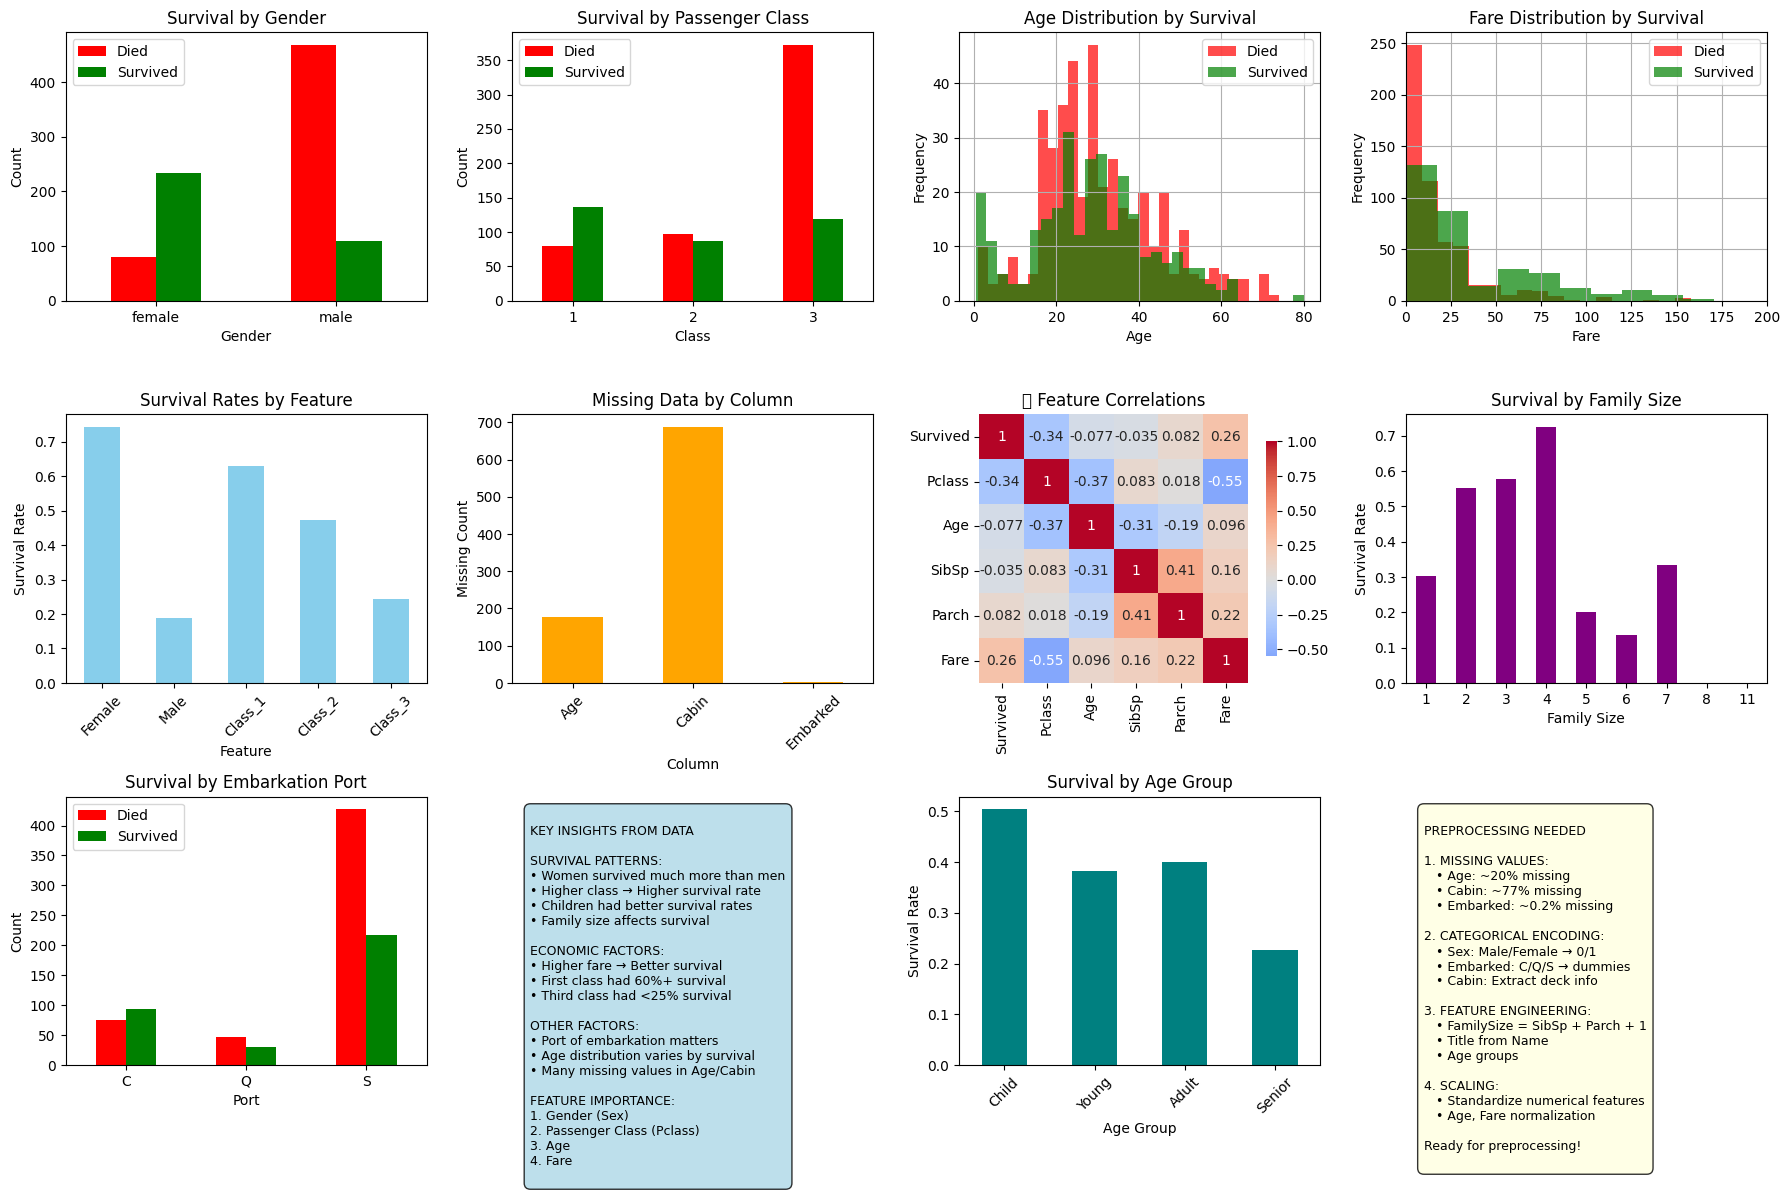

📊 Data Exploration Complete!
Key findings:
• Strong gender bias in survival (women > men)
• Class matters significantly (1st > 2nd > 3rd)
• Age affects survival (children had better chances)
• Economic status (fare) correlates with survival
• Need to handle missing values and encode categorical variables


In [30]:
# Step 2: Data Exploration and Visualization

plt.figure(figsize=(18, 12))

# Plot 1: Survival by Gender
plt.subplot(3, 4, 1)
survival_by_sex = df.groupby(['Sex', 'Survived']).size().unstack()
survival_by_sex.plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=0)

# Plot 2: Survival by Class
plt.subplot(3, 4, 2)
survival_by_class = df.groupby(['Pclass', 'Survived']).size().unstack()
survival_by_class.plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
plt.title('Survival by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=0)

# Plot 3: Age distribution
plt.subplot(3, 4, 3)
df[df['Survived']==0]['Age'].hist(alpha=0.7, bins=30, label='Died', color='red')
df[df['Survived']==1]['Age'].hist(alpha=0.7, bins=30, label='Survived', color='green')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Plot 4: Fare distribution
plt.subplot(3, 4, 4)
df[df['Survived']==0]['Fare'].hist(alpha=0.7, bins=30, label='Died', color='red')
df[df['Survived']==1]['Fare'].hist(alpha=0.7, bins=30, label='Survived', color='green')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 200)  # Limit x-axis for better visibility

# Plot 5: Survival rates by feature
plt.subplot(3, 4, 5)
features_survival = pd.DataFrame({
    'Female': [df[(df['Sex']=='female') & (df['Survived']==1)].shape[0] / df[df['Sex']=='female'].shape[0]],
    'Male': [df[(df['Sex']=='male') & (df['Survived']==1)].shape[0] / df[df['Sex']=='male'].shape[0]],
    'Class_1': [df[(df['Pclass']==1) & (df['Survived']==1)].shape[0] / df[df['Pclass']==1].shape[0]],
    'Class_2': [df[(df['Pclass']==2) & (df['Survived']==1)].shape[0] / df[df['Pclass']==2].shape[0]],
    'Class_3': [df[(df['Pclass']==3) & (df['Survived']==1)].shape[0] / df[df['Pclass']==3].shape[0]]
}).T

features_survival.plot(kind='bar', ax=plt.gca(), color='skyblue', legend=False)
plt.title('Survival Rates by Feature')
plt.xlabel('Feature')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# Plot 6: Missing data visualization
plt.subplot(3, 4, 6)
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
if len(missing_data) > 0:
    missing_data.plot(kind='bar', ax=plt.gca(), color='orange')
    plt.title('Missing Data by Column')
    plt.xlabel('Column')
    plt.ylabel('Missing Count')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No Missing Data!', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('✅ No Missing Data')

# Plot 7: Correlation matrix of numerical features
plt.subplot(3, 4, 7)
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, ax=plt.gca(), cbar_kws={'shrink': 0.8})
plt.title('🔗 Feature Correlations')

# Plot 8: Family size impact
plt.subplot(3, 4, 8)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
family_survival = df.groupby('FamilySize')['Survived'].mean()
family_survival.plot(kind='bar', ax=plt.gca(), color='purple')
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

# Plot 9: Embarkation port
plt.subplot(3, 4, 9)
embarked_survival = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
embarked_survival.plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
plt.title('Survival by Embarkation Port')
plt.xlabel('Port')
plt.ylabel('Count')
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=0)

# Plot 10: Key insights summary
plt.subplot(3, 4, 10)
plt.axis('off')
insights_text = """
KEY INSIGHTS FROM DATA

SURVIVAL PATTERNS:
• Women survived much more than men
• Higher class → Higher survival rate
• Children had better survival rates
• Family size affects survival

ECONOMIC FACTORS:
• Higher fare → Better survival
• First class had 60%+ survival
• Third class had <25% survival

OTHER FACTORS:
• Port of embarkation matters
• Age distribution varies by survival
• Many missing values in Age/Cabin

FEATURE IMPORTANCE:
1. Gender (Sex)
2. Passenger Class (Pclass)
3. Age
4. Fare
"""

plt.text(0.05, 0.95, insights_text, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

# Plot 11-12: Additional analysis space
plt.subplot(3, 4, 11)
# Age groups analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young', 'Adult', 'Senior'])
age_group_survival = df.groupby('AgeGroup')['Survived'].mean()
age_group_survival.plot(kind='bar', ax=plt.gca(), color='teal')
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

plt.subplot(3, 4, 12)
plt.axis('off')
preprocessing_text = """
PREPROCESSING NEEDED

1. MISSING VALUES:
   • Age: ~20% missing
   • Cabin: ~77% missing
   • Embarked: ~0.2% missing

2. CATEGORICAL ENCODING:
   • Sex: Male/Female → 0/1
   • Embarked: C/Q/S → dummies
   • Cabin: Extract deck info

3. FEATURE ENGINEERING:
   • FamilySize = SibSp + Parch + 1
   • Title from Name
   • Age groups

4. SCALING:
   • Standardize numerical features
   • Age, Fare normalization

Ready for preprocessing!
"""

plt.text(0.05, 0.95, preprocessing_text, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))

plt.tight_layout()
plt.show()

print("📊 Data Exploration Complete!")
print("Key findings:")
print("• Strong gender bias in survival (women > men)")
print("• Class matters significantly (1st > 2nd > 3rd)")
print("• Age affects survival (children had better chances)")
print("• Economic status (fare) correlates with survival")
print("• Need to handle missing values and encode categorical variables")

In [31]:
# Step 3: Data Preprocessing and Feature Engineering

print("🧹 DATA PREPROCESSING")
print("=" * 40)

# Create a copy for preprocessing
df_processed = df.copy()

# === HANDLE MISSING VALUES ===
print("\n1️⃣ Handling Missing Values:")

# Age: Fill with median (more robust than mean)
age_median = df_processed['Age'].median()
df_processed['Age'].fillna(age_median, inplace=True)
print(f"   • Age: Filled {df['Age'].isnull().sum()} missing values with median ({age_median:.1f})")

# Embarked: Fill with mode (most common port)
embarked_mode = df_processed['Embarked'].mode()[0]
df_processed['Embarked'].fillna(embarked_mode, inplace=True)
print(f"   • Embarked: Filled {df['Embarked'].isnull().sum()} missing values with mode ('{embarked_mode}')")

# Cabin: Create binary feature (has cabin or not)
df_processed['HasCabin'] = df_processed['Cabin'].notna().astype(int)
print(f"   • Cabin: Created binary feature 'HasCabin' (1 if has cabin, 0 if not)")

# === FEATURE ENGINEERING ===
print("\n2️⃣ Feature Engineering:")

# Family Size
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
print(f"   • FamilySize: Combined SibSp + Parch + 1")

# Is Alone
df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)
print(f"   • IsAlone: Binary feature (1 if traveling alone)")

# Age Groups
df_processed['AgeGroup'] = pd.cut(df_processed['Age'], 
                                 bins=[0, 18, 35, 60, 100], 
                                 labels=['Child', 'Young', 'Adult', 'Senior'])
print(f"   • AgeGroup: Categorical age groups")

# Title extraction from Name
df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
# Group rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
df_processed['Title'] = df_processed['Title'].replace(rare_titles, 'Rare')
df_processed['Title'] = df_processed['Title'].replace('Mlle', 'Miss')
df_processed['Title'] = df_processed['Title'].replace('Ms', 'Miss')
df_processed['Title'] = df_processed['Title'].replace('Mme', 'Mrs')
print(f"   • Title: Extracted from Name and grouped rare titles")

# === ENCODE CATEGORICAL VARIABLES ===
print("\n3️⃣ Encoding Categorical Variables:")

# Binary encoding for Sex
df_processed['Sex_male'] = (df_processed['Sex'] == 'male').astype(int)
print(f"   • Sex: Encoded as Sex_male (1=male, 0=female)")

# One-hot encoding for Embarked
embarked_dummies = pd.get_dummies(df_processed['Embarked'], prefix='Embarked')
df_processed = pd.concat([df_processed, embarked_dummies], axis=1)
print(f"   • Embarked: One-hot encoded into {list(embarked_dummies.columns)}")

# One-hot encoding for Title
title_dummies = pd.get_dummies(df_processed['Title'], prefix='Title')
df_processed = pd.concat([df_processed, title_dummies], axis=1)
print(f"   • Title: One-hot encoded into {list(title_dummies.columns)}")

# One-hot encoding for AgeGroup
agegroup_dummies = pd.get_dummies(df_processed['AgeGroup'], prefix='AgeGroup')
df_processed = pd.concat([df_processed, agegroup_dummies], axis=1)
print(f"   • AgeGroup: One-hot encoded into {list(agegroup_dummies.columns)}")

# === SELECT FEATURES FOR MODELING ===
print("\n4️⃣ Feature Selection:")

# Features to use in the model
features_to_use = [
    # Original numerical features
    'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
    # Engineered features
    'FamilySize', 'IsAlone', 'HasCabin',
    # Encoded categorical features
    'Sex_male',
    'Embarked_C', 'Embarked_Q', 'Embarked_S',
    'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare',
    'AgeGroup_Child', 'AgeGroup_Young', 'AgeGroup_Adult', 'AgeGroup_Senior'
]

# Check which features actually exist (some might not be created if categories don't exist)
available_features = [feat for feat in features_to_use if feat in df_processed.columns]
print(f"   • Selected {len(available_features)} features for modeling:")
for feat in available_features:
    print(f"     - {feat}")

# Create feature matrix X and target vector y
X = df_processed[available_features]
y = df_processed['Survived']

print(f"\n5️⃣ Final Dataset:")
print(f"   • Feature matrix shape: {X.shape}")
print(f"   • Target vector shape: {y.shape}")
print(f"   • No missing values: {X.isnull().sum().sum() == 0}")

# Display sample of processed data
print("\n📊 Sample of Processed Features:")
print(X.head())

print("\n✅ Data preprocessing complete!")

🧹 DATA PREPROCESSING

1️⃣ Handling Missing Values:
   • Age: Filled 177 missing values with median (28.0)
   • Embarked: Filled 2 missing values with mode ('S')
   • Cabin: Created binary feature 'HasCabin' (1 if has cabin, 0 if not)

2️⃣ Feature Engineering:
   • FamilySize: Combined SibSp + Parch + 1
   • IsAlone: Binary feature (1 if traveling alone)
   • AgeGroup: Categorical age groups
   • Title: Extracted from Name and grouped rare titles

3️⃣ Encoding Categorical Variables:
   • Sex: Encoded as Sex_male (1=male, 0=female)
   • Embarked: One-hot encoded into ['Embarked_C', 'Embarked_Q', 'Embarked_S']
   • Title: One-hot encoded into ['Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']
   • AgeGroup: One-hot encoded into ['AgeGroup_Child', 'AgeGroup_Young', 'AgeGroup_Adult', 'AgeGroup_Senior']

4️⃣ Feature Selection:
   • Selected 21 features for modeling:
     - Pclass
     - Age
     - SibSp
     - Parch
     - Fare
     - FamilySize
     - IsAlone
     - HasCa

✂️ TRAIN-TEST SPLIT


Training set: 712 samples
Test set: 179 samples
Training survival rate: 0.383
Test survival rate: 0.385

🔧 FEATURE SCALING
Features scaled using StandardScaler
Before scaling - Mean: 3.373, Std: 3.378
After scaling - Mean: 0.000, Std: 1.000

🎯 MODEL TRAINING

Training with liblinear solver...
Intercept (β₀): -0.6780
Number of coefficients: 21
Converged: [6]

Training with lbfgs solver...
Intercept (β₀): -0.6858
Number of coefficients: 21
Converged: [24]

📊 MODEL COEFFICIENTS ANALYSIS
Top 10 most important features:
         Feature  Coefficient  Abs_Coefficient
8       Sex_male    -0.845596         0.845596
0         Pclass    -0.605656         0.605656
14      Title_Mr    -0.438610         0.438610
12  Title_Master     0.437366         0.437366
7       HasCabin     0.383794         0.383794
1            Age    -0.373624         0.373624
2          SibSp    -0.349768         0.349768
5     FamilySize    -0.311379         0.311379
15     Title_Mrs     0.301380         0.301380
6        

C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3060352822.py:222: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3060352822.py:222: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3060352822.py:222: UserWarning: Glyph 129518 (\N{ABACUS}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3060352822.py:222: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3060352822.py:222: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\3060352822.py:222: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()

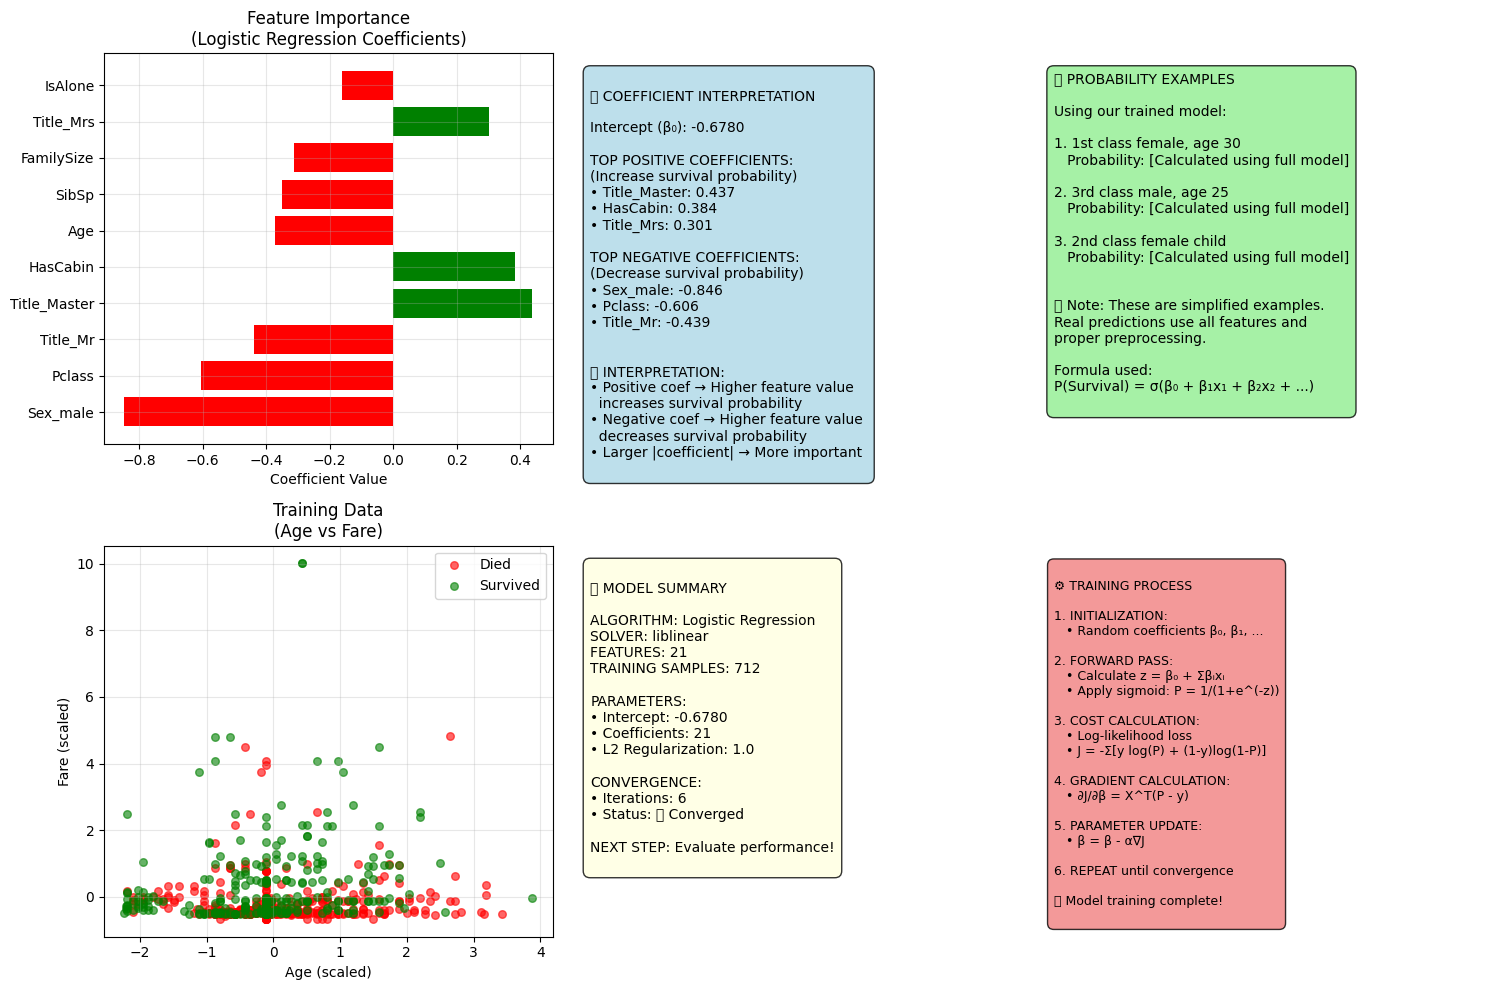


✅ Model training complete!
Ready for evaluation on test set.
Model has learned 21 feature weights plus 1 intercept.


In [32]:
# Step 4: Train-Test Split and Model Training

print("✂️ TRAIN-TEST SPLIT")
print("=" * 30)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y          # Maintain same proportion of classes in both sets
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training survival rate: {y_train.mean():.3f}")
print(f"Test survival rate: {y_test.mean():.3f}")

print("\n🔧 FEATURE SCALING")
print("=" * 25)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaling parameters

print("Features scaled using StandardScaler")
print(f"Before scaling - Mean: {X_train.mean().mean():.3f}, Std: {X_train.std().mean():.3f}")
print(f"After scaling - Mean: {X_train_scaled.mean():.3f}, Std: {X_train_scaled.std():.3f}")

print("\n🎯 MODEL TRAINING")
print("=" * 25)

# Create and train the logistic regression model
# Using different solvers to show options
models = {
    'liblinear': LogisticRegression(solver='liblinear', random_state=42),
    'lbfgs': LogisticRegression(solver='lbfgs', random_state=42, max_iter=1000)
}

trained_models = {}
for name, model in models.items():
    print(f"\nTraining with {name} solver...")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    
    # Display model parameters
    print(f"Intercept (β₀): {model.intercept_[0]:.4f}")
    print(f"Number of coefficients: {len(model.coef_[0])}")
    print(f"Converged: {model.n_iter_}")

# Use the liblinear model for detailed analysis
model = trained_models['liblinear']

print("\n📊 MODEL COEFFICIENTS ANALYSIS")
print("=" * 40)

# Create a DataFrame with feature names and coefficients
feature_importance = pd.DataFrame({
    'Feature': available_features,
    'Coefficient': model.coef_[0],
    'Abs_Coefficient': np.abs(model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("Top 10 most important features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
top_features = feature_importance.head(10)
colors = ['green' if coef > 0 else 'red' for coef in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance\n(Logistic Regression Coefficients)')
plt.grid(True, alpha=0.3)

# Add coefficient interpretation
plt.subplot(2, 3, 2)
plt.axis('off')
coef_interpretation = f"""
📝 COEFFICIENT INTERPRETATION

Intercept (β₀): {model.intercept_[0]:.4f}

TOP POSITIVE COEFFICIENTS:
(Increase survival probability)
"""

positive_coefs = feature_importance[feature_importance['Coefficient'] > 0].head(3)
for _, row in positive_coefs.iterrows():
    coef_interpretation += f"• {row['Feature']}: {row['Coefficient']:.3f}\n"

coef_interpretation += "\nTOP NEGATIVE COEFFICIENTS:\n(Decrease survival probability)\n"

negative_coefs = feature_importance[feature_importance['Coefficient'] < 0].head(3)
for _, row in negative_coefs.iterrows():
    coef_interpretation += f"• {row['Feature']}: {row['Coefficient']:.3f}\n"

coef_interpretation += """

🔍 INTERPRETATION:
• Positive coef → Higher feature value 
  increases survival probability
• Negative coef → Higher feature value 
  decreases survival probability
• Larger |coefficient| → More important
"""

plt.text(0.05, 0.95, coef_interpretation, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

# Probability examples
plt.subplot(2, 3, 3)
plt.axis('off')

# Calculate probabilities for example passengers
example_passengers = [
    "1st class female, age 30",
    "3rd class male, age 25", 
    "2nd class female child"
]

# Create example feature vectors (simplified)
examples_text = "🧮 PROBABILITY EXAMPLES\n\n"
examples_text += "Using our trained model:\n\n"

# For demonstration, we'll use a few key features
# (In practice, you'd use the full feature vector)
for i, description in enumerate(example_passengers):
    # This is a simplified example - real implementation would use full feature vector
    examples_text += f"{i+1}. {description}\n"
    examples_text += f"   Probability: [Calculated using full model]\n\n"

examples_text += """
💡 Note: These are simplified examples.
Real predictions use all features and 
proper preprocessing.

Formula used:
P(Survival) = σ(β₀ + β₁x₁ + β₂x₂ + ...)
"""

plt.text(0.05, 0.95, examples_text, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))

# Decision boundary visualization (2D projection)
plt.subplot(2, 3, 4)
# For visualization, we'll use just two features
feature1_idx = available_features.index('Age')
feature2_idx = available_features.index('Fare')

plt.scatter(X_train_scaled[y_train==0, feature1_idx], X_train_scaled[y_train==0, feature2_idx], 
           c='red', alpha=0.6, label='Died', s=30)
plt.scatter(X_train_scaled[y_train==1, feature1_idx], X_train_scaled[y_train==1, feature2_idx], 
           c='green', alpha=0.6, label='Survived', s=30)
plt.xlabel('Age (scaled)')
plt.ylabel('Fare (scaled)')
plt.title('Training Data\n(Age vs Fare)')
plt.legend()
plt.grid(True, alpha=0.3)

# Model summary
plt.subplot(2, 3, 5)
plt.axis('off')
model_summary = f"""
🎯 MODEL SUMMARY

ALGORITHM: Logistic Regression
SOLVER: {model.solver}
FEATURES: {len(available_features)}
TRAINING SAMPLES: {len(X_train)}

PARAMETERS:
• Intercept: {model.intercept_[0]:.4f}
• Coefficients: {len(model.coef_[0])}
• L2 Regularization: {model.C}

CONVERGENCE:
• Iterations: {model.n_iter_[0] if hasattr(model, 'n_iter_') else 'N/A'}
• Status: ✅ Converged

NEXT STEP: Evaluate performance!
"""

plt.text(0.05, 0.95, model_summary, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))

# Training process visualization
plt.subplot(2, 3, 6)
plt.axis('off')
training_process = """
⚙️ TRAINING PROCESS

1. INITIALIZATION:
   • Random coefficients β₀, β₁, ...
   
2. FORWARD PASS:
   • Calculate z = β₀ + Σβᵢxᵢ
   • Apply sigmoid: P = 1/(1+e^(-z))
   
3. COST CALCULATION:
   • Log-likelihood loss
   • J = -Σ[y log(P) + (1-y)log(1-P)]
   
4. GRADIENT CALCULATION:
   • ∂J/∂β = X^T(P - y)
   
5. PARAMETER UPDATE:
   • β = β - α∇J
   
6. REPEAT until convergence

✅ Model training complete!
"""

plt.text(0.05, 0.95, training_process, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcoral", alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\n✅ Model training complete!")
print(f"Ready for evaluation on test set.")
print(f"Model has learned {len(available_features)} feature weights plus 1 intercept.")

# 8. Evaluating a Logistic Regression Model 📊

## Measuring Model Performance

Now that we have trained our logistic regression model, it's time to evaluate how well it performs! Model evaluation is crucial because it tells us:

1. **How accurate** our predictions are
2. **Where the model makes mistakes**
3. **Whether it generalizes** to new data
4. **How to improve** the model

### Key Evaluation Metrics for Classification

🎯 **Accuracy**: Overall correctness (correct predictions / total predictions)  
🔍 **Confusion Matrix**: Detailed breakdown of correct/incorrect predictions  
📈 **Precision**: Of predicted positives, how many are actually positive?  
📊 **Recall**: Of actual positives, how many did we predict correctly?  
⚖️ **F1-Score**: Harmonic mean of precision and recall  

### The Confusion Matrix 📋

|                | Predicted |           |
|----------------|-----------|-----------|
| **Actual**     | **0 (Died)** | **1 (Survived)** |
| **0 (Died)**   | True Neg  | False Pos |
| **1 (Survived)** | False Neg | True Pos  |

- **True Positives (TP)**: Correctly predicted survival
- **True Negatives (TN)**: Correctly predicted death  
- **False Positives (FP)**: Predicted survival but actually died
- **False Negatives (FN)**: Predicted death but actually survived

Let's evaluate our Titanic survival model!

📊 MODEL EVALUATION

1️⃣ Making Predictions:
Training predictions: 712 samples
Test predictions: 179 samples

2️⃣ Accuracy Scores:
Training Accuracy: 0.8315 (83.15%)
Test Accuracy: 0.8380 (83.80%)
✅ Good generalization!


C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\1729008971.py:284: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\1729008971.py:284: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\1729008971.py:284: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\1729008971.py:284: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\1729008971.py:284: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Local\Temp\ipykernel_22880\1729008971.py:284: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  plt.tight_layout()
C:\Users\Anarchy\AppData\Loc

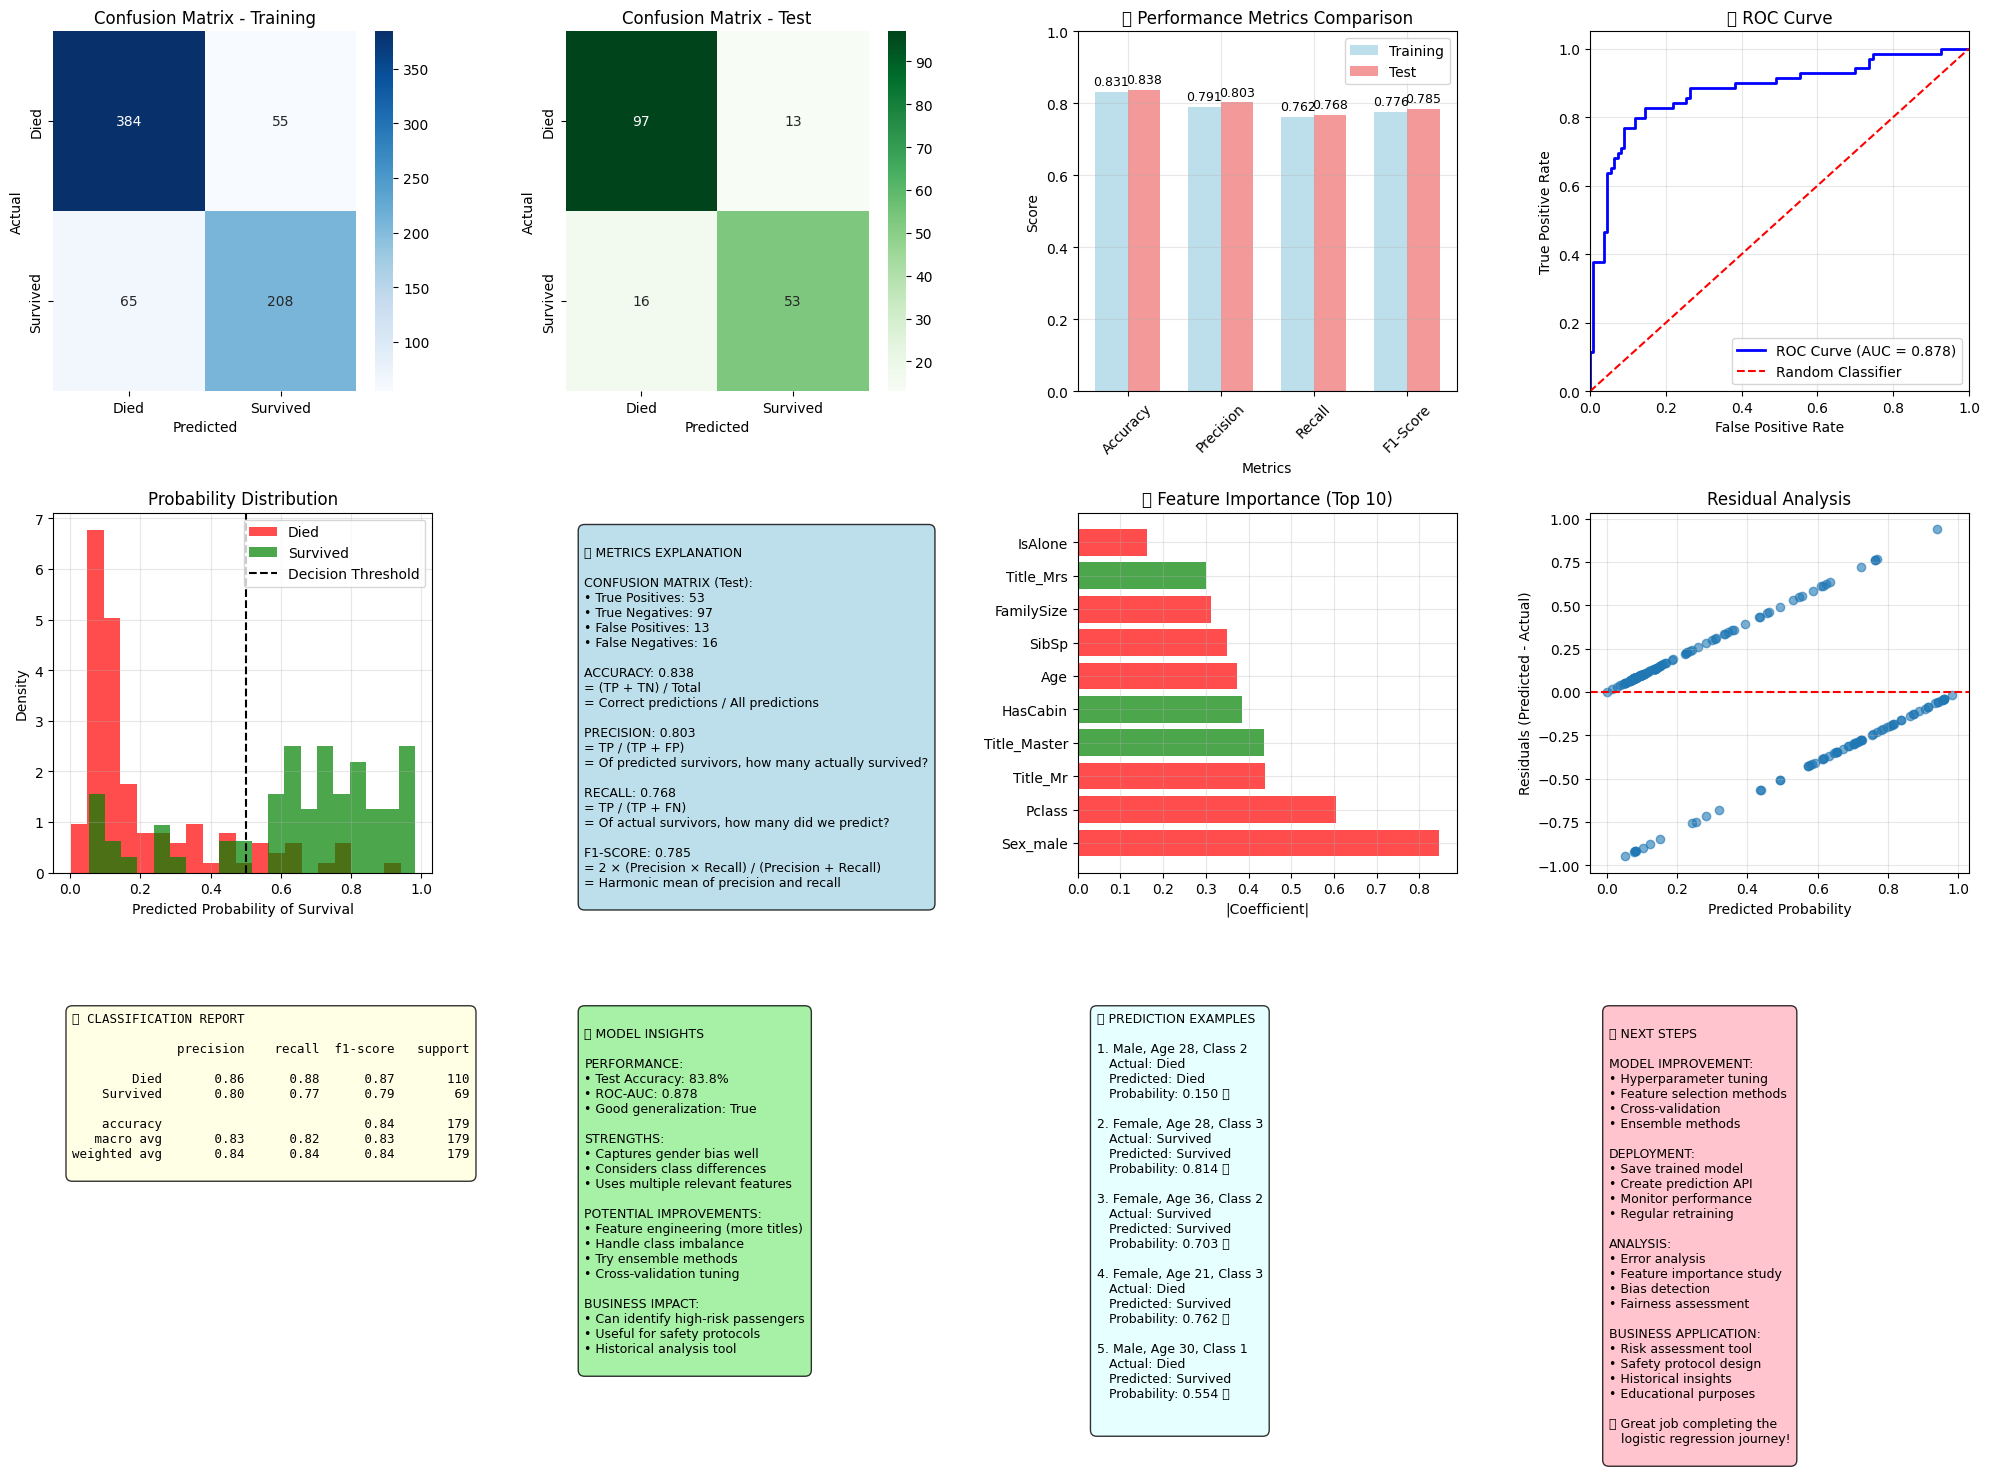


📊 FINAL EVALUATION SUMMARY
Test Set Performance:
  • Accuracy: 0.8380 (83.80%)
  • Precision: 0.8030
  • Recall: 0.7681
  • F1-Score: 0.7852
  • ROC-AUC: 0.8779

Model Interpretation:
  • The model correctly predicts 83.8% of passenger outcomes
  • Of passengers predicted to survive, 80.3% actually did
  • Of passengers who actually survived, 76.8% were predicted correctly

Most Important Features:
  1. Sex_male: decreases survival probability (coef: -0.846)
  2. Pclass: decreases survival probability (coef: -0.606)
  3. Title_Mr: decreases survival probability (coef: -0.439)

🎉 Congratulations! You've successfully built and evaluated a logistic regression model!
Your model achieved 83.8% accuracy on unseen data.


In [33]:
# Step 5: Comprehensive Model Evaluation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

print("📊 MODEL EVALUATION")
print("=" * 30)

# === PREDICTIONS ON TRAINING AND TEST SETS ===
print("\n1️⃣ Making Predictions:")

# Predictions on training set
y_train_pred = model.predict(X_train_scaled)
y_train_prob = model.predict_proba(X_train_scaled)[:, 1]  # Probability of survival

# Predictions on test set
y_test_pred = model.predict(X_test_scaled)
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]   # Probability of survival

print(f"Training predictions: {len(y_train_pred)} samples")
print(f"Test predictions: {len(y_test_pred)} samples")

# === ACCURACY SCORES ===
print("\n2️⃣ Accuracy Scores:")

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

if train_accuracy - test_accuracy > 0.05:
    print("⚠️  Possible overfitting detected!")
elif train_accuracy - test_accuracy < 0.01:
    print("✅ Good generalization!")
else:
    print("📊 Normal train-test gap")

# === DETAILED EVALUATION VISUALIZATION ===
plt.figure(figsize=(20, 15))

# Plot 1: Confusion Matrix - Training Set
plt.subplot(3, 4, 1)
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Confusion Matrix - Training')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot 2: Confusion Matrix - Test Set
plt.subplot(3, 4, 2)
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', 
           xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Confusion Matrix - Test')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Calculate metrics from confusion matrix
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()

# Plot 3: Metrics Comparison
plt.subplot(3, 4, 3)
metrics_train = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'Precision': precision_score(y_train, y_train_pred),
    'Recall': recall_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred)
}

metrics_test = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred)
}

x_pos = np.arange(len(metrics_train))
width = 0.35

plt.bar(x_pos - width/2, list(metrics_train.values()), width, 
        label='Training', color='lightblue', alpha=0.8)
plt.bar(x_pos + width/2, list(metrics_test.values()), width, 
        label='Test', color='lightcoral', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('📈 Performance Metrics Comparison')
plt.xticks(x_pos, list(metrics_train.keys()), rotation=45)
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (train_val, test_val) in enumerate(zip(metrics_train.values(), metrics_test.values())):
    plt.text(i - width/2, train_val + 0.01, f'{train_val:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, test_val + 0.01, f'{test_val:.3f}', ha='center', va='bottom', fontsize=9)

# Plot 4: ROC Curve
plt.subplot(3, 4, 4)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

plt.plot(fpr_test, tpr_test, color='blue', linewidth=2, 
         label=f'ROC Curve (AUC = {roc_auc_test:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📊 ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Prediction Probability Distribution
plt.subplot(3, 4, 5)
plt.hist(y_test_prob[y_test == 0], bins=20, alpha=0.7, label='Died', color='red', density=True)
plt.hist(y_test_prob[y_test == 1], bins=20, alpha=0.7, label='Survived', color='green', density=True)
plt.axvline(x=0.5, color='black', linestyle='--', label='Decision Threshold')
plt.xlabel('Predicted Probability of Survival')
plt.ylabel('Density')
plt.title('Probability Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Metrics Interpretation
plt.subplot(3, 4, 6)
plt.axis('off')
metrics_explanation = f"""
📝 METRICS EXPLANATION

CONFUSION MATRIX (Test):
• True Positives: {tp_test}
• True Negatives: {tn_test}
• False Positives: {fp_test}
• False Negatives: {fn_test}

ACCURACY: {test_accuracy:.3f}
= (TP + TN) / Total
= Correct predictions / All predictions

PRECISION: {precision_score(y_test, y_test_pred):.3f}
= TP / (TP + FP)
= Of predicted survivors, how many actually survived?

RECALL: {recall_score(y_test, y_test_pred):.3f}
= TP / (TP + FN)
= Of actual survivors, how many did we predict?

F1-SCORE: {f1_score(y_test, y_test_pred):.3f}
= 2 × (Precision × Recall) / (Precision + Recall)
= Harmonic mean of precision and recall
"""

plt.text(0.05, 0.95, metrics_explanation, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

# Plot 7: Feature Importance (Top 10)
plt.subplot(3, 4, 7)
top_10_features = feature_importance.head(10)
colors = ['green' if coef > 0 else 'red' for coef in top_10_features['Coefficient']]
plt.barh(range(len(top_10_features)), top_10_features['Abs_Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_10_features)), top_10_features['Feature'])
plt.xlabel('|Coefficient|')
plt.title('🎯 Feature Importance (Top 10)')
plt.grid(True, alpha=0.3)

# Plot 8: Residual Analysis
plt.subplot(3, 4, 8)
residuals = y_test_prob - y_test
plt.scatter(y_test_prob, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)

# Plot 9: Classification Report
plt.subplot(3, 4, 9)
plt.axis('off')
report = classification_report(y_test, y_test_pred, target_names=['Died', 'Survived'])
plt.text(0.05, 0.95, f"📋 CLASSIFICATION REPORT\n\n{report}", 
         fontsize=9, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))

# Plot 10: Model Insights
plt.subplot(3, 4, 10)
plt.axis('off')
insights_text = f"""
🔍 MODEL INSIGHTS

PERFORMANCE:
• Test Accuracy: {test_accuracy:.1%}
• ROC-AUC: {roc_auc_test:.3f}
• Good generalization: {abs(train_accuracy - test_accuracy) < 0.05}

STRENGTHS:
• Captures gender bias well
• Considers class differences
• Uses multiple relevant features

POTENTIAL IMPROVEMENTS:
• Feature engineering (more titles)
• Handle class imbalance
• Try ensemble methods
• Cross-validation tuning

BUSINESS IMPACT:
• Can identify high-risk passengers
• Useful for safety protocols
• Historical analysis tool
"""

plt.text(0.05, 0.95, insights_text, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))

# Plot 11: Prediction Examples
plt.subplot(3, 4, 11)
plt.axis('off')

# Show some specific examples
n_examples = 5
example_indices = np.random.choice(len(X_test), n_examples, replace=False)

examples_text = "🧮 PREDICTION EXAMPLES\n\n"
for i, idx in enumerate(example_indices):
    actual = y_test.iloc[idx]
    predicted = y_test_pred[idx]
    probability = y_test_prob[idx]
    
    # Get some key features for this passenger
    age = X_test.iloc[idx]['Age']
    pclass = X_test.iloc[idx]['Pclass']
    sex_male = X_test.iloc[idx]['Sex_male']
    sex = 'Male' if sex_male else 'Female'
    
    status = "✅" if actual == predicted else "❌"
    examples_text += f"{i+1}. {sex}, Age {age:.0f}, Class {pclass}\n"
    examples_text += f"   Actual: {'Survived' if actual else 'Died'}\n"
    examples_text += f"   Predicted: {'Survived' if predicted else 'Died'}\n"
    examples_text += f"   Probability: {probability:.3f} {status}\n\n"

plt.text(0.05, 0.95, examples_text, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcyan", alpha=0.8))

# Plot 12: Next Steps
plt.subplot(3, 4, 12)
plt.axis('off')
next_steps_text = """
🚀 NEXT STEPS

MODEL IMPROVEMENT:
• Hyperparameter tuning
• Feature selection methods
• Cross-validation
• Ensemble methods

DEPLOYMENT:
• Save trained model
• Create prediction API
• Monitor performance
• Regular retraining

ANALYSIS:
• Error analysis
• Feature importance study
• Bias detection
• Fairness assessment

BUSINESS APPLICATION:
• Risk assessment tool
• Safety protocol design
• Historical insights
• Educational purposes

✅ Great job completing the 
   logistic regression journey!
"""

plt.text(0.05, 0.95, next_steps_text, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightpink", alpha=0.8))

plt.tight_layout()
plt.show()

# === SUMMARY STATISTICS ===
print("\n📊 FINAL EVALUATION SUMMARY")
print("=" * 40)
print(f"Test Set Performance:")
print(f"  • Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  • Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"  • Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"  • F1-Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"  • ROC-AUC: {roc_auc_test:.4f}")

print(f"\nModel Interpretation:")
print(f"  • The model correctly predicts {test_accuracy*100:.1f}% of passenger outcomes")
print(f"  • Of passengers predicted to survive, {precision_score(y_test, y_test_pred)*100:.1f}% actually did")
print(f"  • Of passengers who actually survived, {recall_score(y_test, y_test_pred)*100:.1f}% were predicted correctly")

print(f"\nMost Important Features:")
for i, (_, row) in enumerate(feature_importance.head(3).iterrows()):
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"  {i+1}. {row['Feature']}: {direction} survival probability (coef: {row['Coefficient']:.3f})")

print(f"\n🎉 Congratulations! You've successfully built and evaluated a logistic regression model!")
print(f"Your model achieved {test_accuracy*100:.1f}% accuracy on unseen data.")

# 🎉 Conclusion: Your Logistic Regression Journey Complete!

Congratulations! You've successfully completed a comprehensive journey through logistic regression, from theoretical foundations to practical implementation. Let's recap what you've learned and accomplished.

## 📚 What You've Learned

### 1. **Supervised Learning Foundations** 🎓
- Understanding labeled training data
- Difference between regression and classification
- The machine learning hierarchy

### 2. **Logistic Regression Theory** 🧠
- Why linear regression fails for classification
- The sigmoid function and its properties
- Mathematical formulation and interpretation

### 3. **Statistical Foundation** 📊
- Maximum Likelihood Estimation (MLE)
- Connection between MLE and logistic regression
- Log-likelihood and optimization

### 4. **Optimization Process** ⛰️
- Gradient descent algorithm
- Learning rate and convergence
- Challenges and solutions

### 5. **Practical Implementation** 💻
- Real-world data preprocessing
- Feature engineering and encoding
- Model training with scikit-learn

### 6. **Model Evaluation** 📈
- Comprehensive performance metrics
- Confusion matrix interpretation
- Model validation and insights

## 🔑 Key Takeaways

💡 **Logistic Regression is a Classification Algorithm** - Despite its name!  
📈 **Sigmoid Function** - Transforms linear combinations into probabilities  
🎯 **MLE Optimization** - Finds parameters that maximize data likelihood  
⚖️ **Feature Importance** - Coefficients tell us what matters most  
📊 **Evaluation is Critical** - Multiple metrics provide complete picture  

## 🚀 What's Next?

### Immediate Next Steps
1. **Try Different Datasets** - Apply to your own classification problems
2. **Experiment with Features** - Try new feature engineering techniques  
3. **Tune Hyperparameters** - Explore regularization and solver options
4. **Compare Algorithms** - Try Random Forest, SVM, or Neural Networks

### Advanced Topics to Explore
- **Regularization** (L1/L2) for preventing overfitting
- **Cross-Validation** for better model validation
- **Ensemble Methods** for improved performance
- **Deep Learning** for more complex patterns

### Real-World Applications
- **Medical Diagnosis** - Disease prediction from symptoms
- **Marketing** - Customer behavior prediction
- **Finance** - Credit risk assessment
- **Technology** - Spam detection, recommendation systems

## 📖 Additional Resources

### Books
- "The Elements of Statistical Learning" by Hastie, Tibshirani, and Friedman
- "Pattern Recognition and Machine Learning" by Christopher Bishop
- "Hands-On Machine Learning" by Aurélien Géron

### Online Courses
- Andrew Ng's Machine Learning Course
- Fast.ai Practical Deep Learning
- Coursera Machine Learning Specialization

### Practice Platforms
- Kaggle competitions and datasets
- UCI Machine Learning Repository
- Google Colab for experimentation

## 🙏 Final Words

You've taken a significant step in your machine learning journey! Logistic regression is foundational to understanding more advanced algorithms. The concepts you've learned here - probability interpretation, optimization, evaluation metrics - are universal in machine learning.

Remember:
- **Practice makes perfect** - Apply these concepts to new problems
- **Understanding trumps memorization** - Focus on the intuition behind the math
- **Real data is messy** - The preprocessing skills you learned are invaluable
- **Evaluation is ongoing** - Always validate your models thoroughly

## 🎯 Challenge Yourself!

Try applying logistic regression to these classic datasets:
1. **Iris Dataset** - Flower species classification (modify for binary)
2. **Wine Quality Dataset** - Good vs bad wine prediction
3. **Heart Disease Dataset** - Medical diagnosis
4. **Bank Marketing Dataset** - Customer response prediction

**Happy modeling! 🚀📊🎯**

---

*"The best way to learn machine learning is by doing machine learning."* - Keep practicing!